# ****ASSIGNMENT 5****

## ***TOYOTA COROLLA - Creation of model for predicting Price.***
### **Considering only the below columns**

    Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

File : ToyotaCorolla.csv

In [505]:
# import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

### **Importing data from file ToyotaCorolla.csv**

In [506]:
# Reading the data from the file 'ToyotaCorolla.csv'
tc_orig_data = pd.read_csv("ToyotaCorolla.csv")
tc_orig_data.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

### **EDA (Exploratory Data Analysis)**

In [507]:
tc_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

#### *Dropping the columns not needed*

In [508]:
# Drop the columns not needed and only retaining the required columns
# Retaining the columns ('Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight')
tc_data = tc_orig_data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
tc_data[0:5]

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [509]:
tc_data.info() # Now there are only 8 Columns i.e., Price, Age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


#### *Checking for missing values*

In [510]:
# check for missing values
tc_data.isna().sum() # The result shows that there are no missing values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

#### *Checking for Null Values*

In [511]:
# Checking to see if there are any null values
# We can get this information using tc_data.info() option as well
tc_data.isnull().sum() # The result shows that there are no null values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

#### *Checking the data structure*

In [512]:
# Data Structure
print(type(tc_data))
print(tc_data.shape)

<class 'pandas.core.frame.DataFrame'>
(1436, 9)


In [513]:
# data types
tc_data.dtypes # check data types of all variables

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

#### *Checking for Duplicates*

In [514]:
# Checking for Duplicate Values
tc_data.duplicated()  # if any 2 rows has same values

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [515]:
# Count of duplicated rows
tc_data[tc_data.duplicated()].shape # We see that there is one duplicate

(1, 9)

In [516]:
# Print the duplicated rows. Since we have duplicates it will show us the record
tc_data[tc_data.duplicated()] # the duplicate is in index 113

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
113  24950          8  13253  116  2000      5      5            234    1320

In [517]:
tc_data.iloc[110:114,:] # Just cross checking and we notice that 112 and 113 are the same so we can delete 113 column

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
110  31000          4   4000  116  2000      5      5            283    1480
111  31275          4   1500  116  2000      5      5            283    1480
112  24950          8  13253  116  2000      5      5            234    1320
113  24950          8  13253  116  2000      5      5            234    1320

In [518]:
tc_data.shape

(1436, 9)

In [519]:
# Dropping the duplicates as well as resetting the index
tc_data = tc_data.drop_duplicates().reset_index(drop=True) # Removing the duplicates by retraining on the first record

In [520]:
tc_data.shape # One row is reduced after dropping the duplicates

(1435, 9)

In [521]:
tc_data.iloc[110:114,:]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
110  31000          4   4000  116  2000      5      5            283    1480
111  31275          4   1500  116  2000      5      5            283    1480
112  24950          8  13253  116  2000      5      5            234    1320
113  22950          7  10000  116  2000      5      5            234    1270

In [522]:
# Print the duplicated rows. Since we don't have any duplicates it is not showing anything
tc_data[tc_data.duplicated()]

Empty DataFrame
Columns: [Price, Age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, Weight]
Index: []

#### *Rename Columns*

In [523]:
# Renaming 'Delivery Time' to 'Delivery_Time' and 'Sorting Time' to 'Sorting_Time', removing the space in between
tc_data.rename(columns = {'Price':'PRICE','cc':'CC', 'Age_08_04':'AGE', 'Doors':'DOORS', 'Gears':'GEARS', 'Quarterly_Tax':'Q_TAX','Weight':'WEIGHT'}, inplace = True)
tc_data.head

<bound method NDFrame.head of       PRICE  AGE     KM   HP    CC  DOORS  GEARS  Q_TAX  WEIGHT
0     13500   23  46986   90  2000      3      5    210    1165
1     13750   23  72937   90  2000      3      5    210    1165
2     13950   24  41711   90  2000      3      5    210    1165
3     14950   26  48000   90  2000      3      5    210    1165
4     13750   30  38500   90  2000      3      5    210    1170
...     ...  ...    ...  ...   ...    ...    ...    ...     ...
1430   7500   69  20544   86  1300      3      5     69    1025
1431  10845   72  19000   86  1300      3      5     69    1015
1432   8500   71  17016   86  1300      3      5     69    1015
1433   7250   70  16916   86  1300      3      5     69    1015
1434   6950   76      1  110  1600      5      5     19    1114

[1435 rows x 9 columns]>

In [524]:
tc_data[0:5]

PRICE  AGE     KM  HP    CC  DOORS  GEARS  Q_TAX  WEIGHT
0  13500   23  46986  90  2000      3      5    210    1165
1  13750   23  72937  90  2000      3      5    210    1165
2  13950   24  41711  90  2000      3      5    210    1165
3  14950   26  48000  90  2000      3      5    210    1165
4  13750   30  38500  90  2000      3      5    210    1170

### **Outlier Detection**

*Plotting tc_data and checking for outliers*

In [525]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Q_TAX', ylabel='Count'>

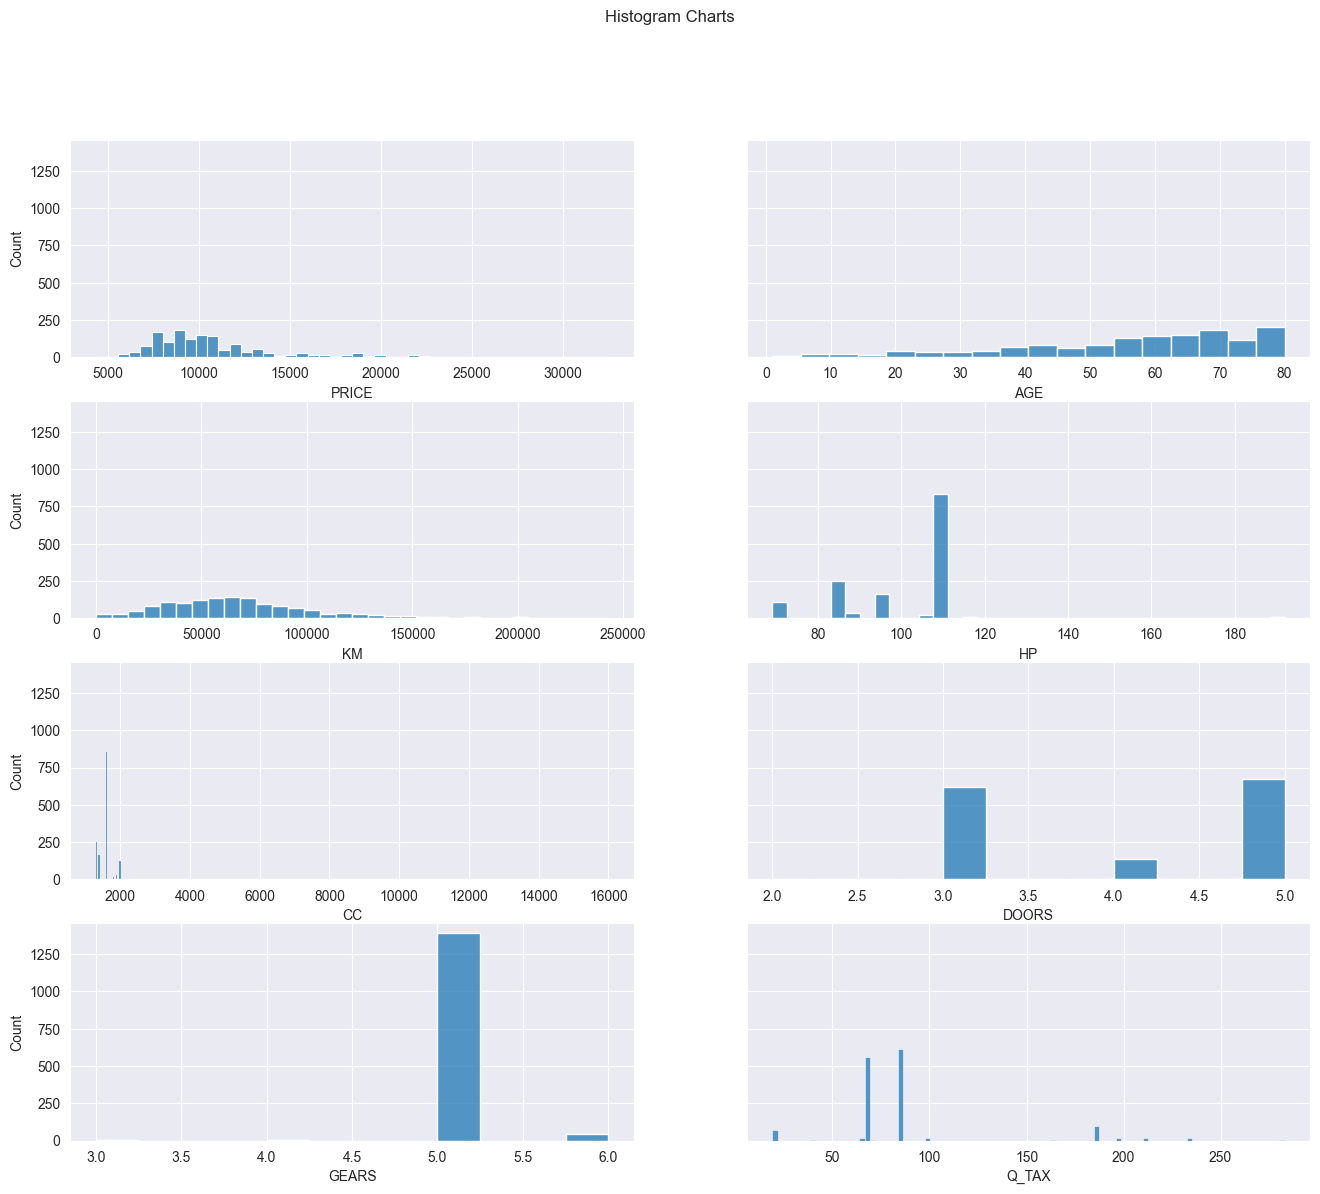

In [526]:
fig, axes = plt.subplots(4, 2, figsize=(16, 13), sharey=True)
fig.suptitle('Histogram Charts')
sns.histplot(ax=axes[0, 0], data=tc_data, x='PRICE')
sns.histplot(ax=axes[0, 1], data=tc_data, x='AGE')
sns.histplot(ax=axes[1, 0], data=tc_data, x='KM')
sns.histplot(ax=axes[1, 1], data=tc_data, x='HP')
sns.histplot(ax=axes[2, 0], data=tc_data, x='CC')
sns.histplot(ax=axes[2, 1], data=tc_data, x='DOORS')
sns.histplot(ax=axes[3, 0], data=tc_data, x='GEARS')
sns.histplot(ax=axes[3, 1], data=tc_data, x='Q_TAX')

<Axes: xlabel='Q_TAX'>

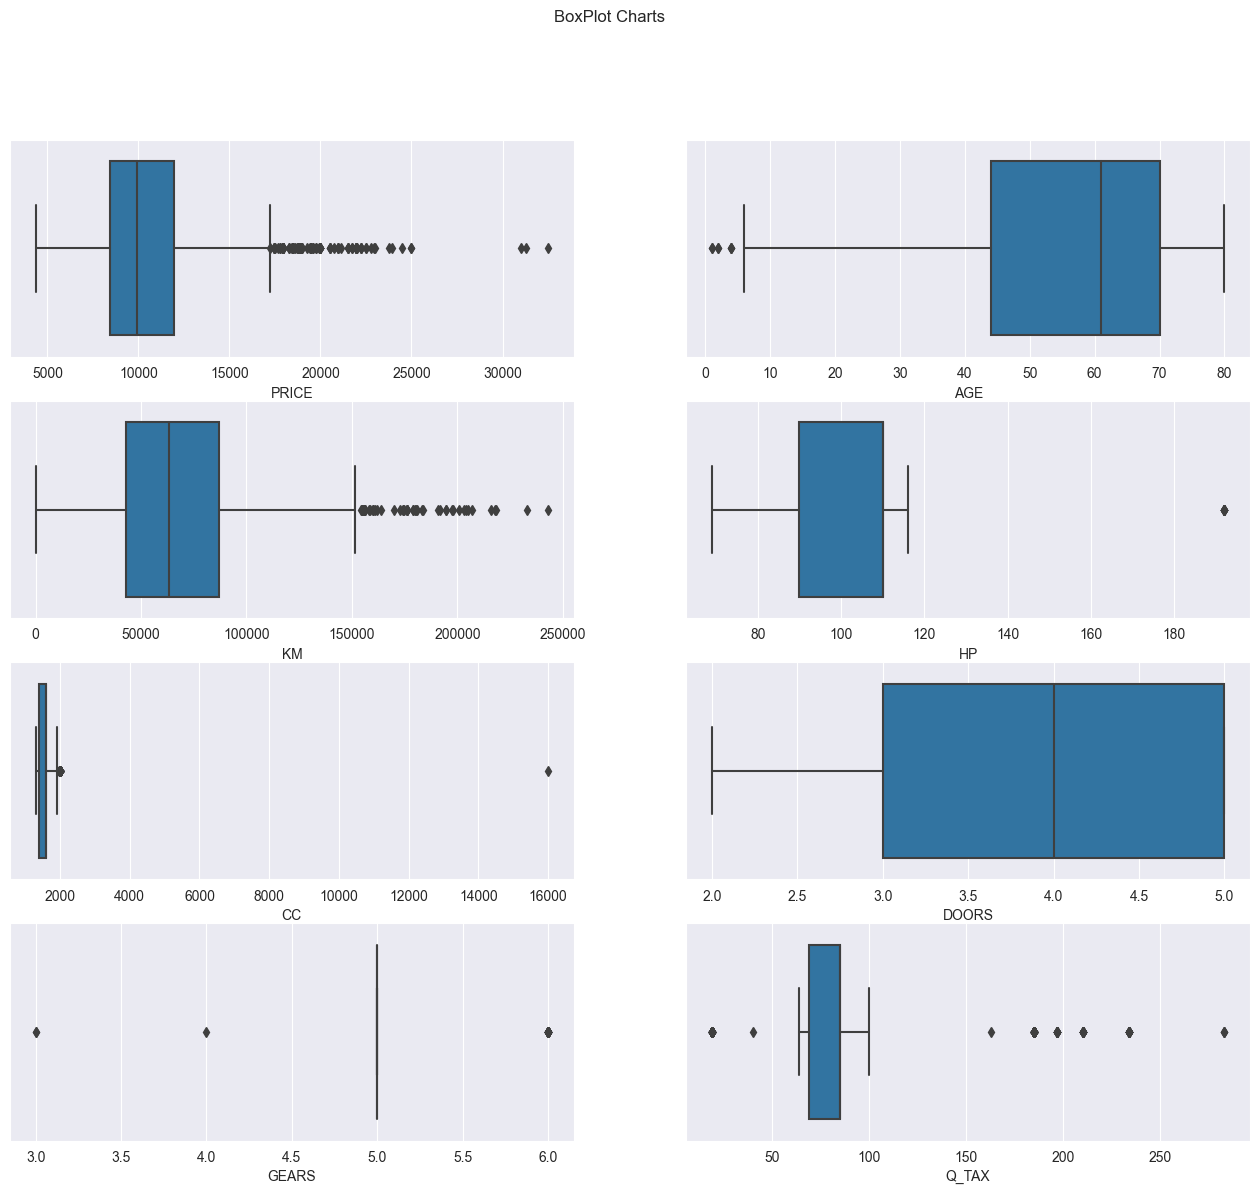

In [527]:
fig, axes = plt.subplots(4, 2, figsize=(16, 13), sharey=True)
fig.suptitle('BoxPlot Charts')
sns.boxplot(ax=axes[0, 0], data=tc_data, x='PRICE')
sns.boxplot(ax=axes[0, 1], data=tc_data, x='AGE')
sns.boxplot(ax=axes[1, 0], data=tc_data, x='KM')
sns.boxplot(ax=axes[1, 1], data=tc_data, x='HP')
sns.boxplot(ax=axes[2, 0], data=tc_data, x='CC')
sns.boxplot(ax=axes[2, 1], data=tc_data, x='DOORS')
sns.boxplot(ax=axes[3, 0], data=tc_data, x='GEARS')
sns.boxplot(ax=axes[3, 1], data=tc_data, x='Q_TAX')

### **Correlation Matrix**
Check for Assumption: Independent variables are independent of each other

In [528]:
tc_data.corr()

# Based on the Correlation Matrix, we don't see any major correlation between any of these independent variables.
# In other words, we don't see the issue with collinearity problem.

PRICE       AGE        KM        HP        CC     DOORS     GEARS  \
PRICE   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
AGE    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
CC      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
DOORS   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
GEARS   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
Q_TAX   0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
WEIGHT  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

           Q_TAX    WEIGHT  
PRICE   0.211508  0.575869  
AGE    -0.193319 -0.466484  
KM      0.283312 -0.023969  
HP     -0.302287  0.087143  
CC      0.305982  0.335077  
DOORS   0.107353  0.301734  
GEARS  -0.005125  0.021238  
Q_TAX   1.000000  0.621988  
WEIGHT  0.621988  1.000000

#### *Scatterplot between variables along with histograms*
Check for Assumption: Independent variables are independent of each other

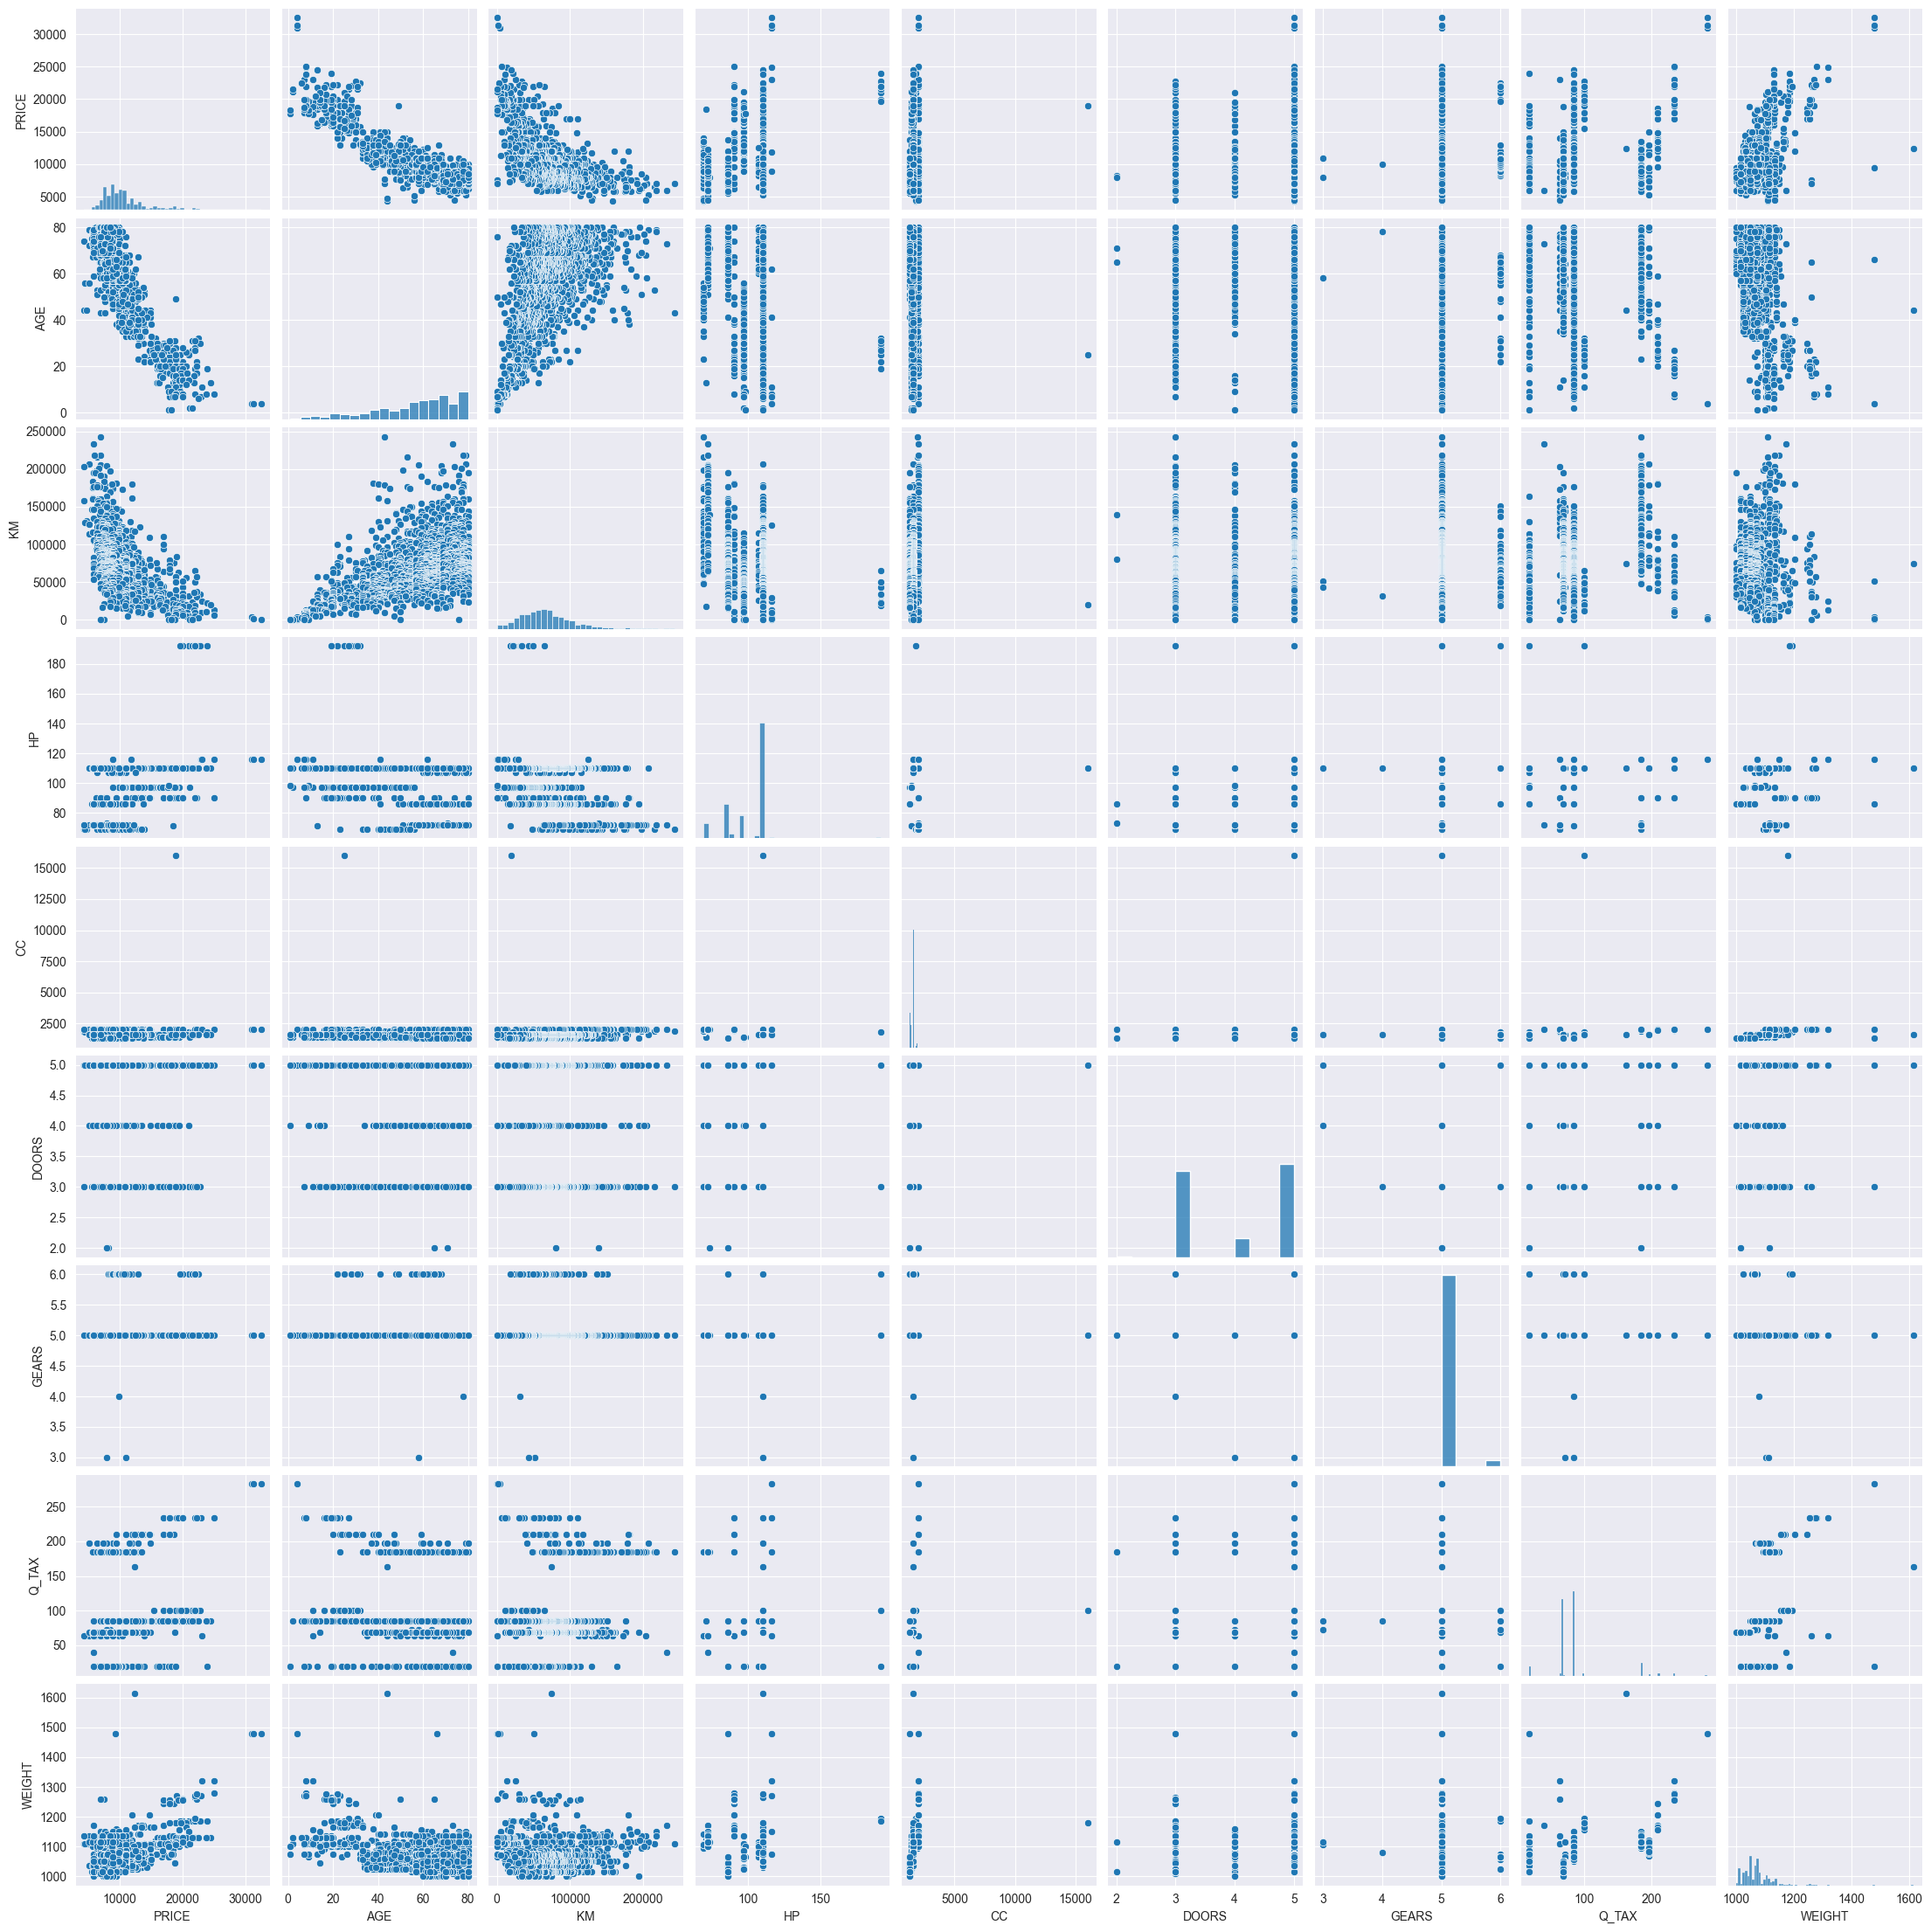

In [529]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(tc_data)

### **Preparing a model**

In [530]:
# Preparing a model
tc_model = smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=tc_data).fit() # excess varaiables can be joined using + symbol

In [531]:
#Coefficients Beta values
tc_model.params

Intercept   -5472.540368
AGE          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
DOORS          -0.920189
GEARS         597.715894
Q_TAX           3.858805
WEIGHT         16.855470
dtype: float64

In [532]:
#t and p-Values: print(tc_model.tvalues,tc_model.pvalues)
print('*** t-values ***','\n',tc_model.tvalues, '\n','*** p-values ***','\n', np.round(tc_model.pvalues,5))
# p values shows that only DOORS and CC are insignificant. The rest are significant.

*** t-values *** 
 Intercept    -3.875273
AGE         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
DOORS        -0.023012
GEARS         3.034563
Q_TAX         2.944198
WEIGHT       15.760663
dtype: float64 
 *** p-values *** 
 Intercept    0.00011
AGE          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
DOORS        0.98164
GEARS        0.00245
Q_TAX        0.00329
WEIGHT       0.00000
dtype: float64


In [533]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
# R squared value tells us how good model is.
(tc_model.rsquared,tc_model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

#### **Simple Linear Regression Models**

##### *Build Simple Linear Regression and Multiple Linear Regression models for the insignificant variables 'CC' and 'DOORS'*

In [534]:
slr_cc=smf.ols('PRICE~CC',data=tc_data).fit()  # Simple Linear Regression model for PRICE Vs CC alone
# t and p-Values
print(slr_cc.tvalues, '\n', slr_cc.pvalues)
# here p-value 2.292856e-06 is approx. = 0, and less than alpha i.e., 0.05 so CC variable is significant

Intercept    24.879592
CC            4.745039
dtype: float64 
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


In [535]:
slr_doors=smf.ols('PRICE~DOORS',data=tc_data).fit()  # Simple Linear Regression model for PRICE Vs DOORS alone
# t and p-Values
print(slr_doors.tvalues, '\n', slr_doors.pvalues)
# The p-value 2.404166e-12 is approx. = 0, and less than alpha i.e., 0.05 so DOORS variable is also significant

Intercept    19.421546
DOORS         7.070520
dtype: float64 
 Intercept    8.976407e-75
DOORS        2.404166e-12
dtype: float64


In [536]:
mlr_cc_doors=smf.ols('PRICE~CC+DOORS',data=tc_data).fit()
mlr_cc_doors.tvalues , mlr_cc_doors.pvalues
# The p-value i.e. 2.101878e-05 and 2.109558e-11 for CC & DOORS are both lesser than alpha and therefore are significant

(Intercept    12.786341
 CC            4.268006
 DOORS         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 DOORS        2.109558e-11
 dtype: float64)

### **Model Validation Techniques**
##### ***1. Collinearity Check***

In [537]:
# 1) Collinearity Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('AGE~KM+HP+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=tc_data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~AGE+HP+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=tc_data).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~KM+AGE+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=tc_data).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('CC~KM+HP+AGE+DOORS+GEARS+Q_TAX+WEIGHT',data=tc_data).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('DOORS~KM+HP+CC+AGE+GEARS+Q_TAX+WEIGHT',data=tc_data).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('GEARS~KM+HP+CC+DOORS+AGE+Q_TAX+WEIGHT',data=tc_data).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_q_tax=smf.ols('Q_TAX~KM+HP+CC+DOORS+GEARS+AGE+WEIGHT',data=tc_data).fit().rsquared
vif_q_tax=1/(1-rsq_q_tax)

rsq_weight=smf.ols('WEIGHT~KM+HP+CC+DOORS+GEARS+Q_TAX+AGE',data=tc_data).fit().rsquared
vif_weight=1/(1-rsq_weight)

# Storing vif values in a data frame
d1 = {'Variables':['AGE','KM','HP','CC','DOORS','GEARS','Q_TAX','WEIGHT'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_q_tax,vif_weight]}
tc_vif = pd.DataFrame(d1)
tc_vif


Variables       VIF
0       AGE  1.876236
1        KM  1.757178
2        HP  1.419180
3        CC  1.163470
4     DOORS  1.155890
5     GEARS  1.098843
6     Q_TAX  2.295375
7    WEIGHT  2.487180

    - VIF equal to 1 = variables are not correlated
    - VIF between 1 and 5 = variables are moderately correlated 
    - VIF greater than 5 = variables are highly correlated

    The higher the VIF, the higher the possibility that multicollinearity exists, and further research is required. 

    When VIF is higher than 10, there is significant multicollinearity that needs to be corrected.

In our case the VIF value is moderately correlated and therefore this once again confirms that there is no multicollinearity issues

#### ***2.  Residual Analysis***

##### *Test for Normality of Residuals (Q-Q Plot)*

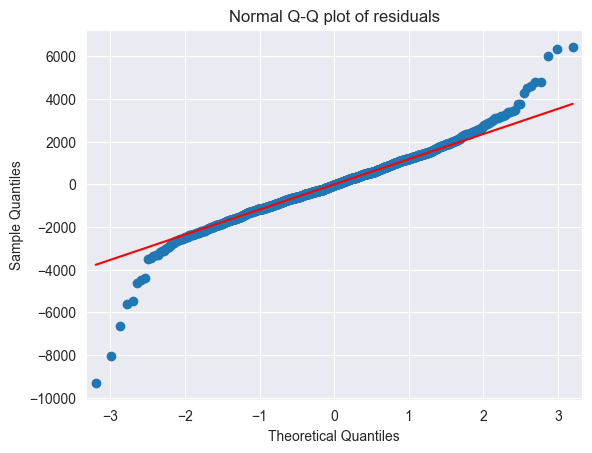

In [538]:
# 2.  Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

import statsmodels.api as sm
tc_model = smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=tc_data).fit() # model.resid is error
qqplot=sm.qqplot(tc_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals") # points that are away from line are outliers
plt.show() # Here some values are more than 6000 y-value and some below -6000

In [539]:
tc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:29:52   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
AGE         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
DOORS         -0.9202     39.988     -0.023      0.982     -79.362      77.522
GEARS        597.7159    196.969      3.035      0.002     211.335     984.097
Q_TAX          3.8588      1.311      2.944      0.003       1.288       6.430
WEIGHT        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [540]:
# The rsquared and aic value
(tc_model.rsquared,tc_model.aic) # The model accuracy is at 86.2%

(0.8625200256947, 24750.407207346932)

In [541]:

list(np.where(tc_model.resid > 6000))  # The outliers detected using the above QQ plot of residuals that are greater than 6000

[array([109, 146, 522], dtype=int64)]

In [542]:
list(np.where(tc_model.resid < -6000)) # The outliers detected using the above QQ plot of residuals that are lesser than -6000

[array([220, 600, 959], dtype=int64)]

#### *Residual Plot for Homoscedasticity: Constant Variance*

In [543]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

# Function definition for standardization i.e. z score, Function name: get_standardized_values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() # This is z score = (Xi - mean)/std. dev.

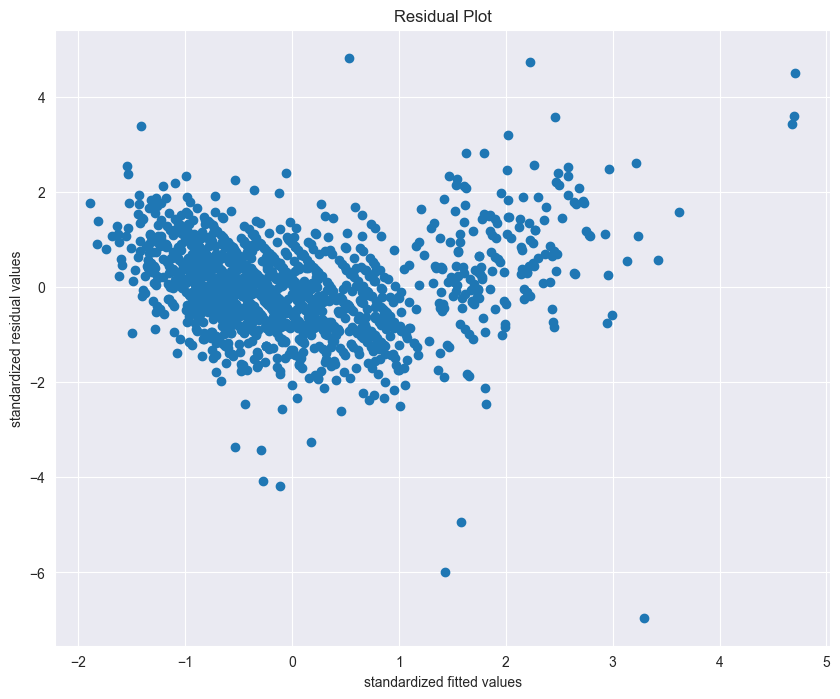

In [544]:
plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(tc_model.fittedvalues), # tc_model.fittedvalue is y-hat
            get_standardized_values(tc_model.resid))        # tc_model.resid is error
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

#### **Residual Vs Regressors**

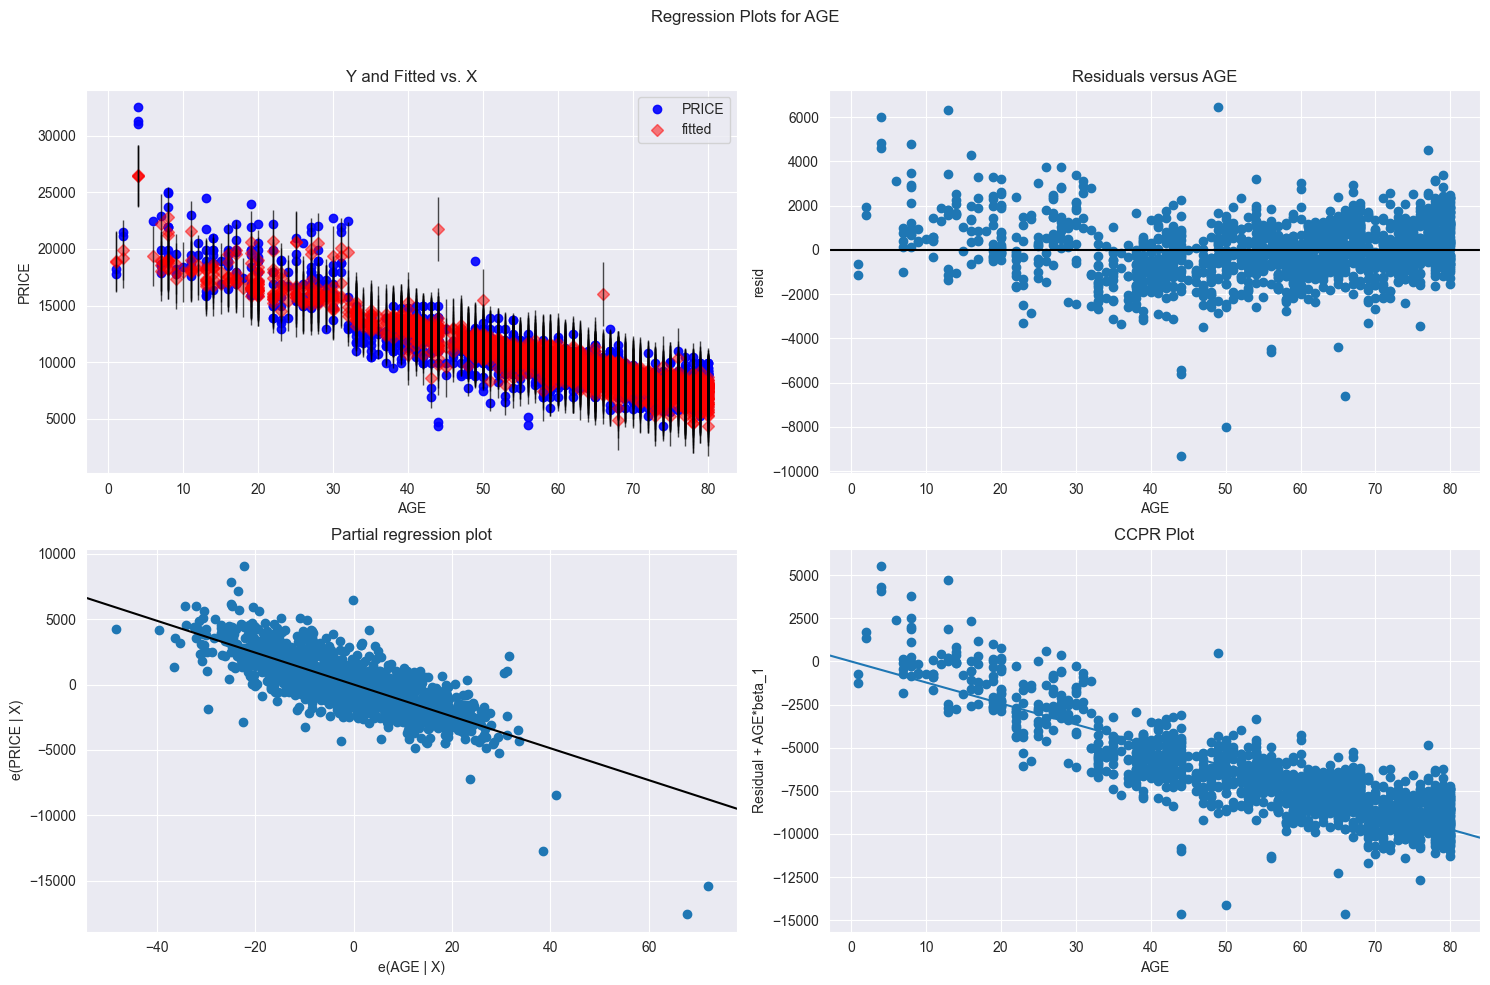

In [545]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(tc_model,'AGE',fig=fig)
plt.show()

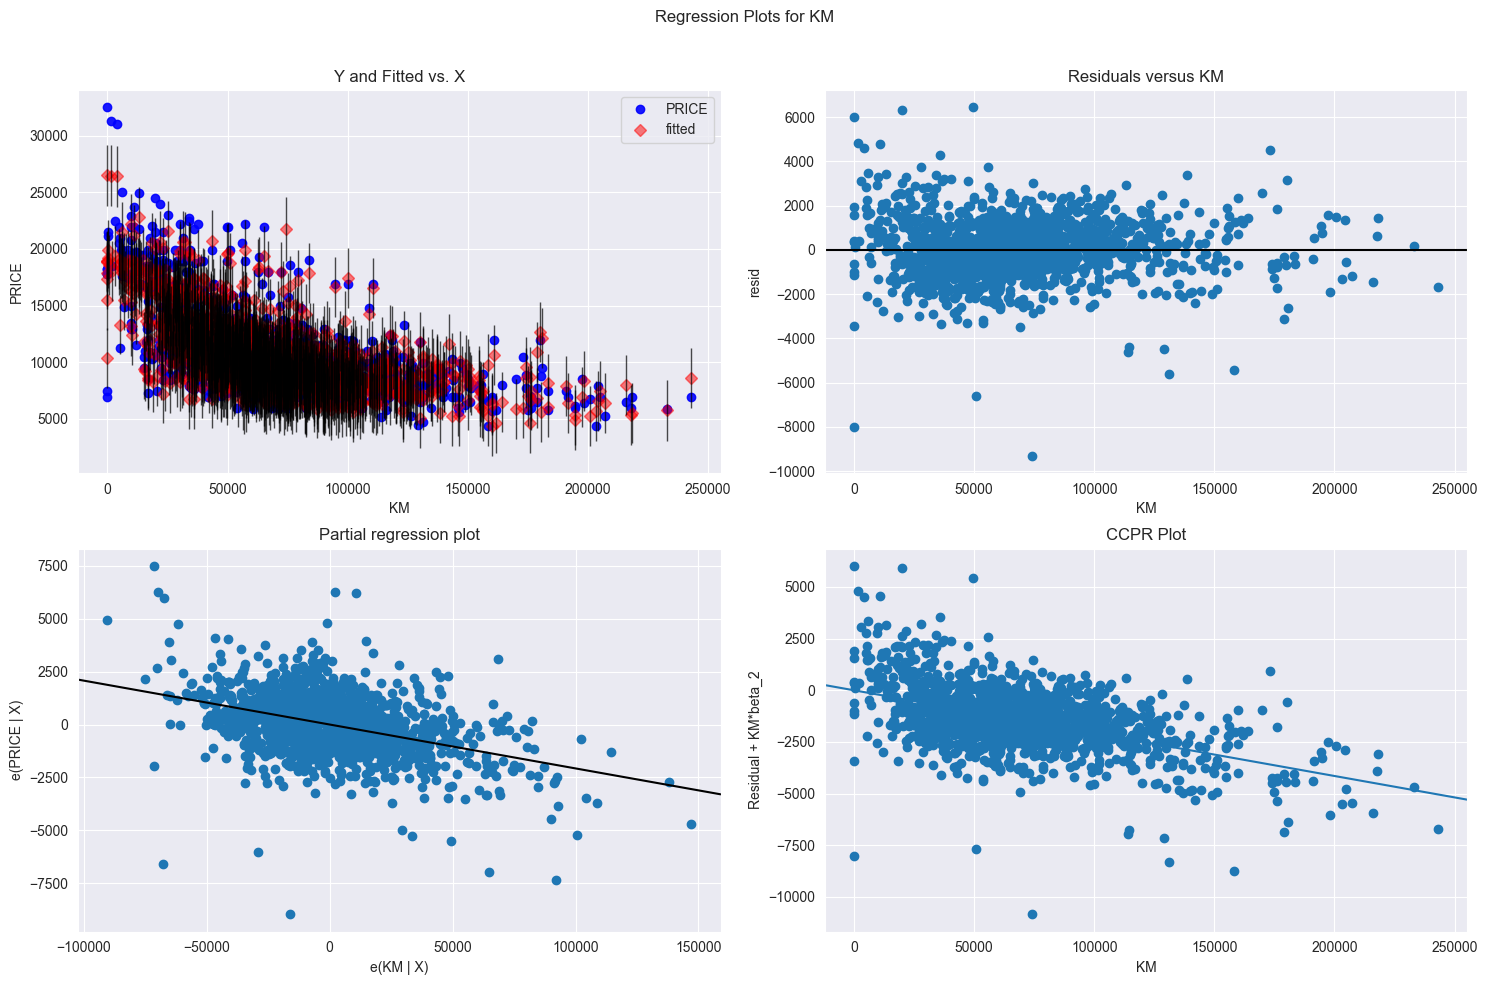

In [546]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(tc_model,'KM',fig=fig)
plt.show()

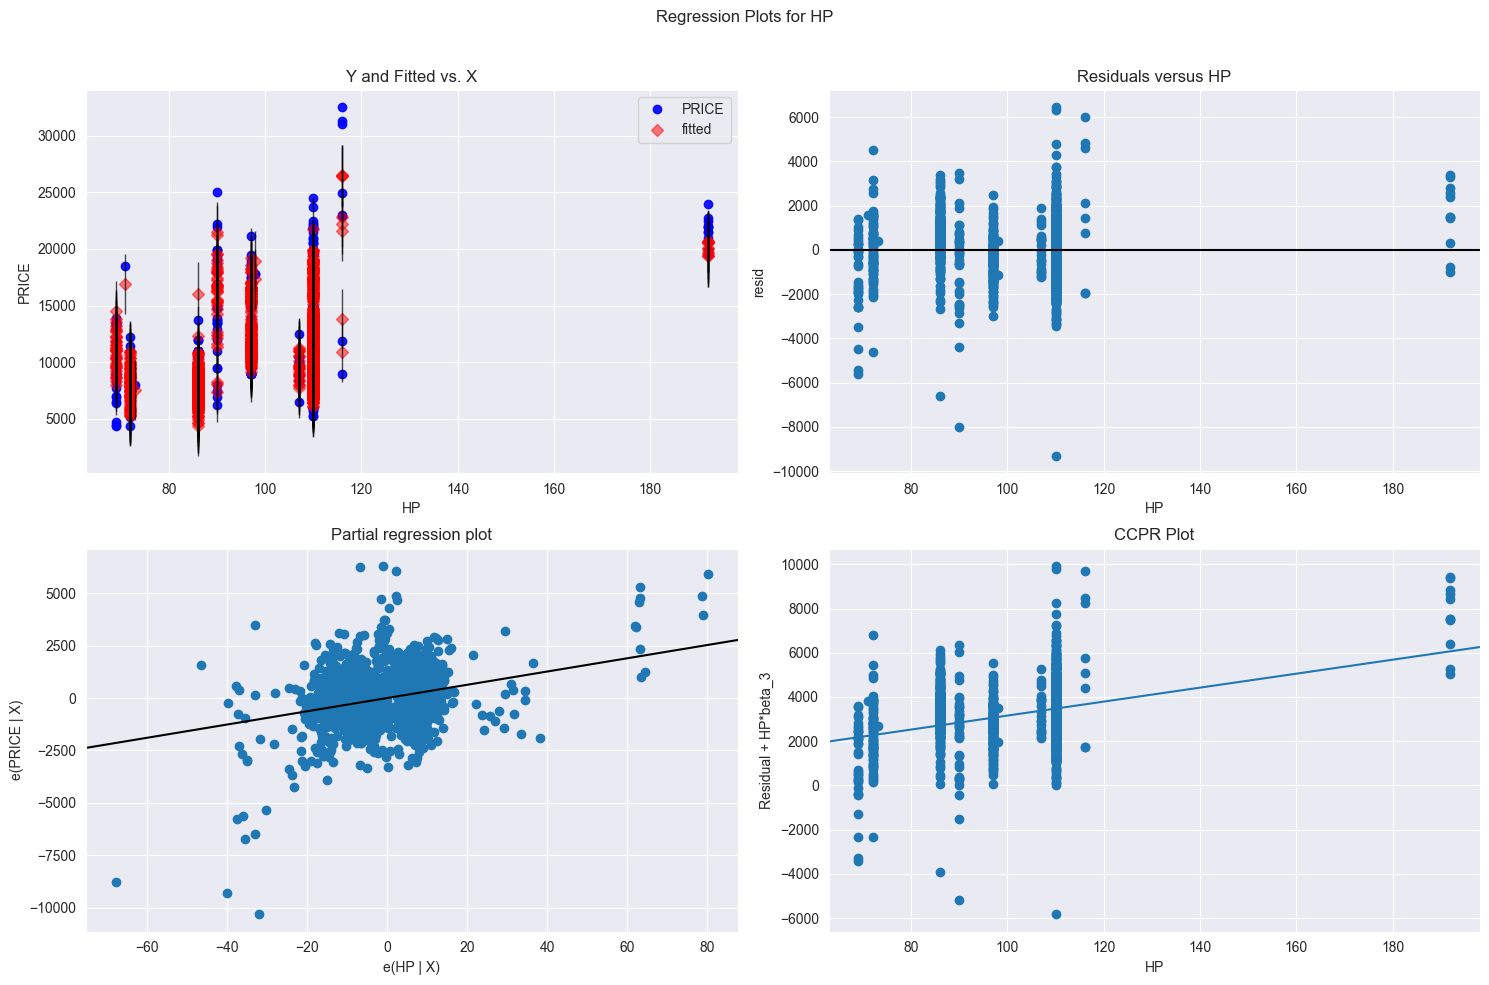

In [547]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(tc_model,'HP',fig=fig)
plt.show()

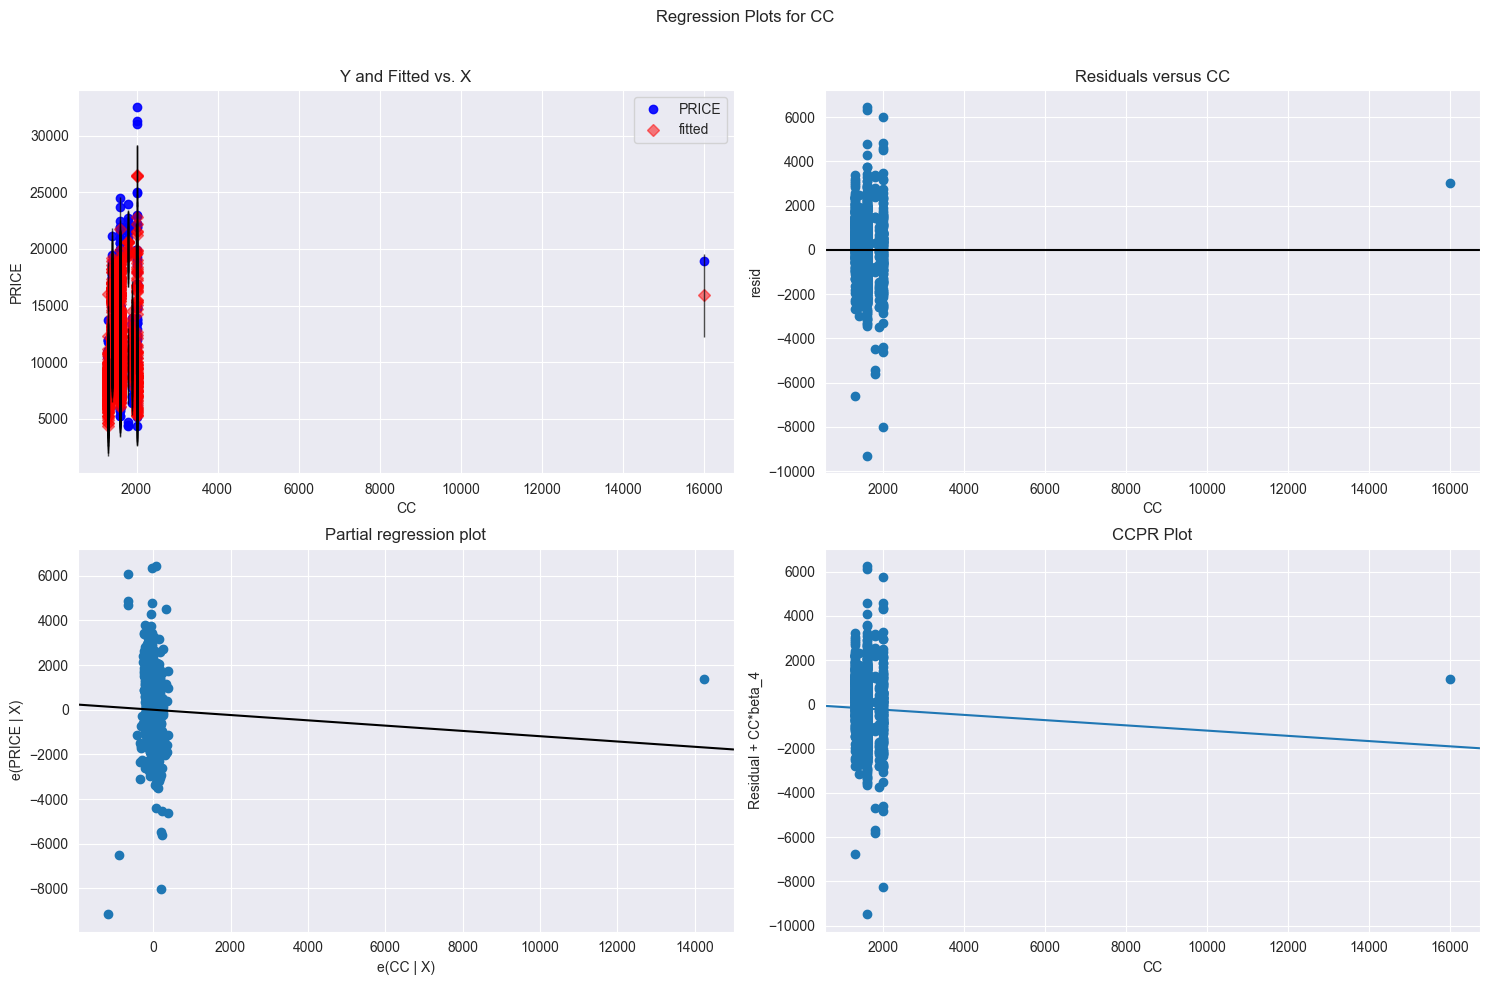

In [548]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(tc_model,'CC',fig=fig)
plt.show()

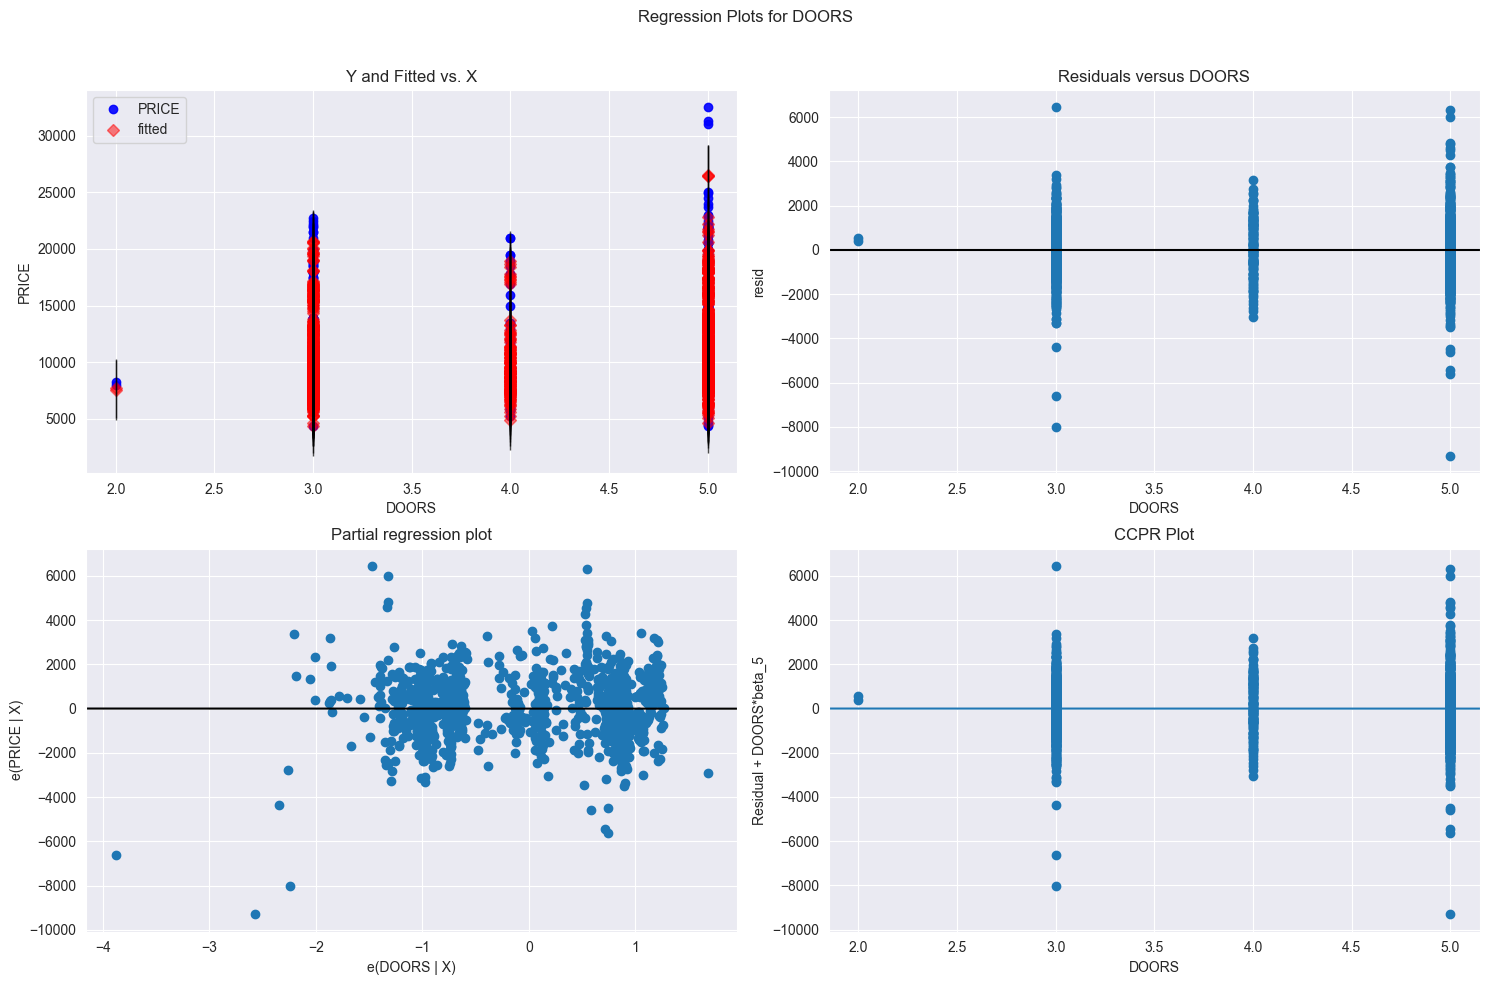

In [549]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(tc_model,'DOORS',fig=fig)
plt.show()

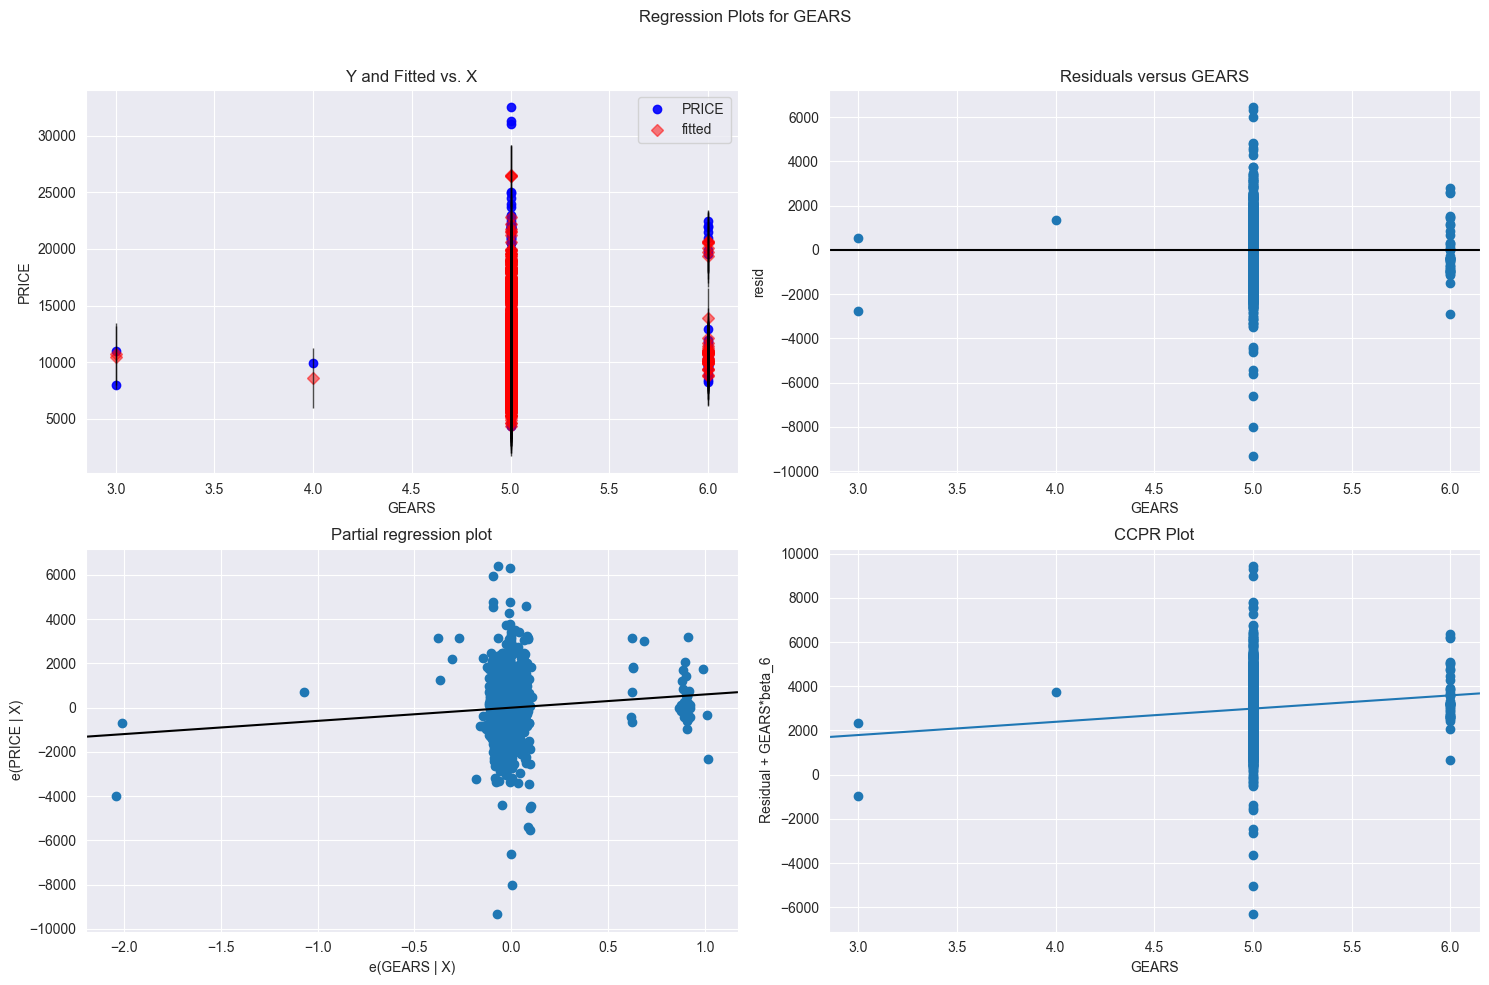

In [550]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(tc_model,'GEARS',fig=fig)
plt.show()

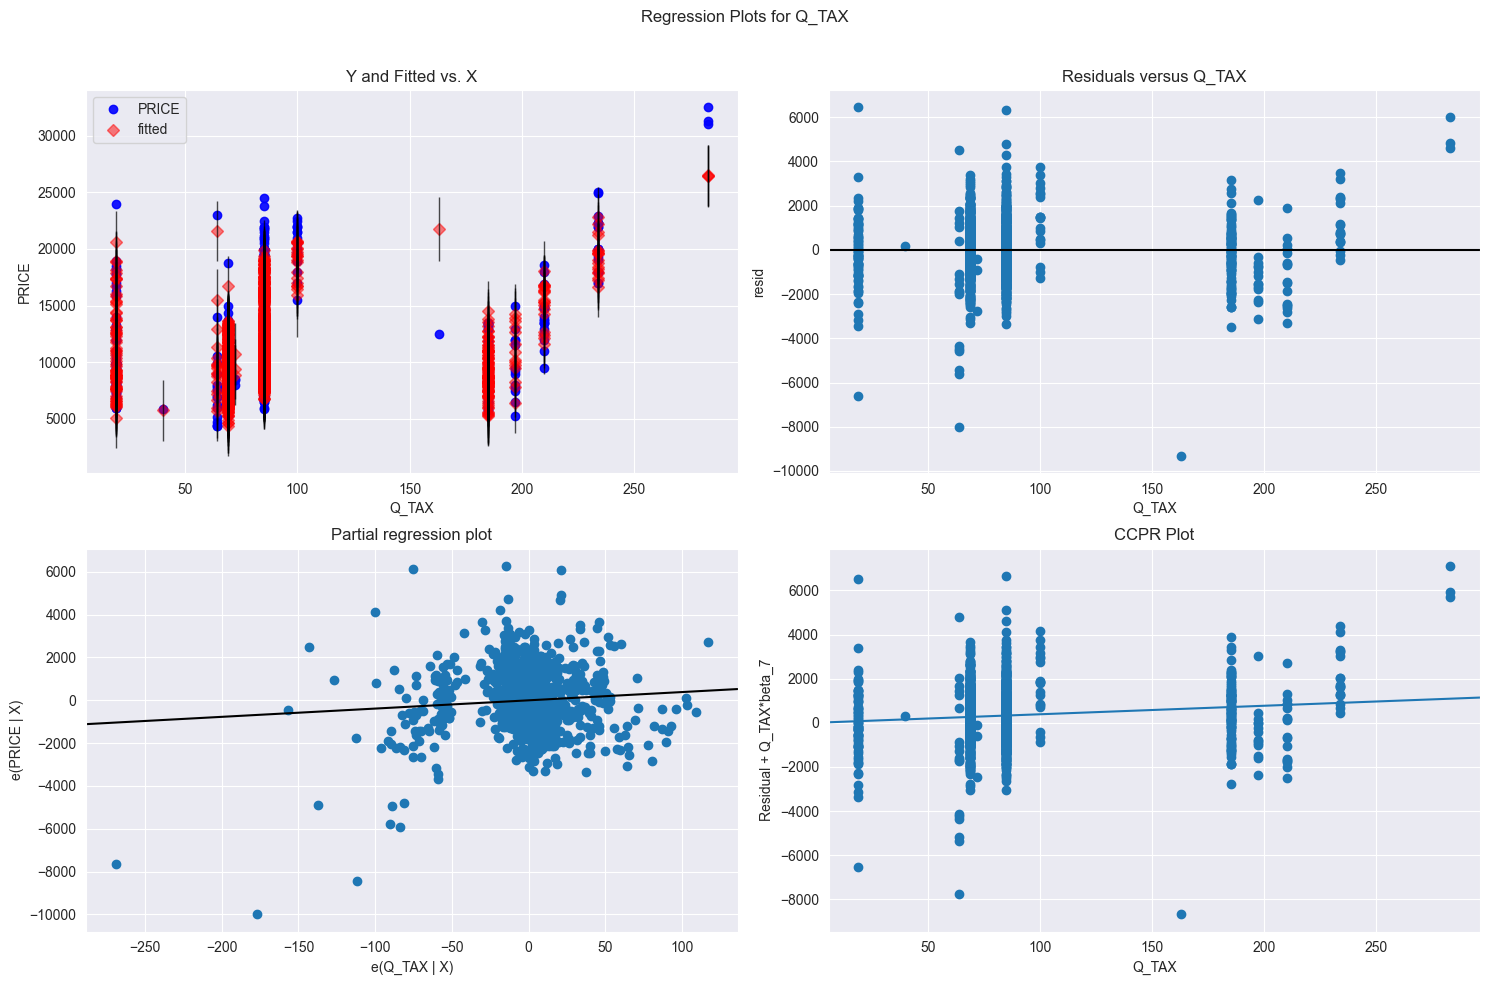

In [551]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(tc_model,'Q_TAX',fig=fig)
plt.show()

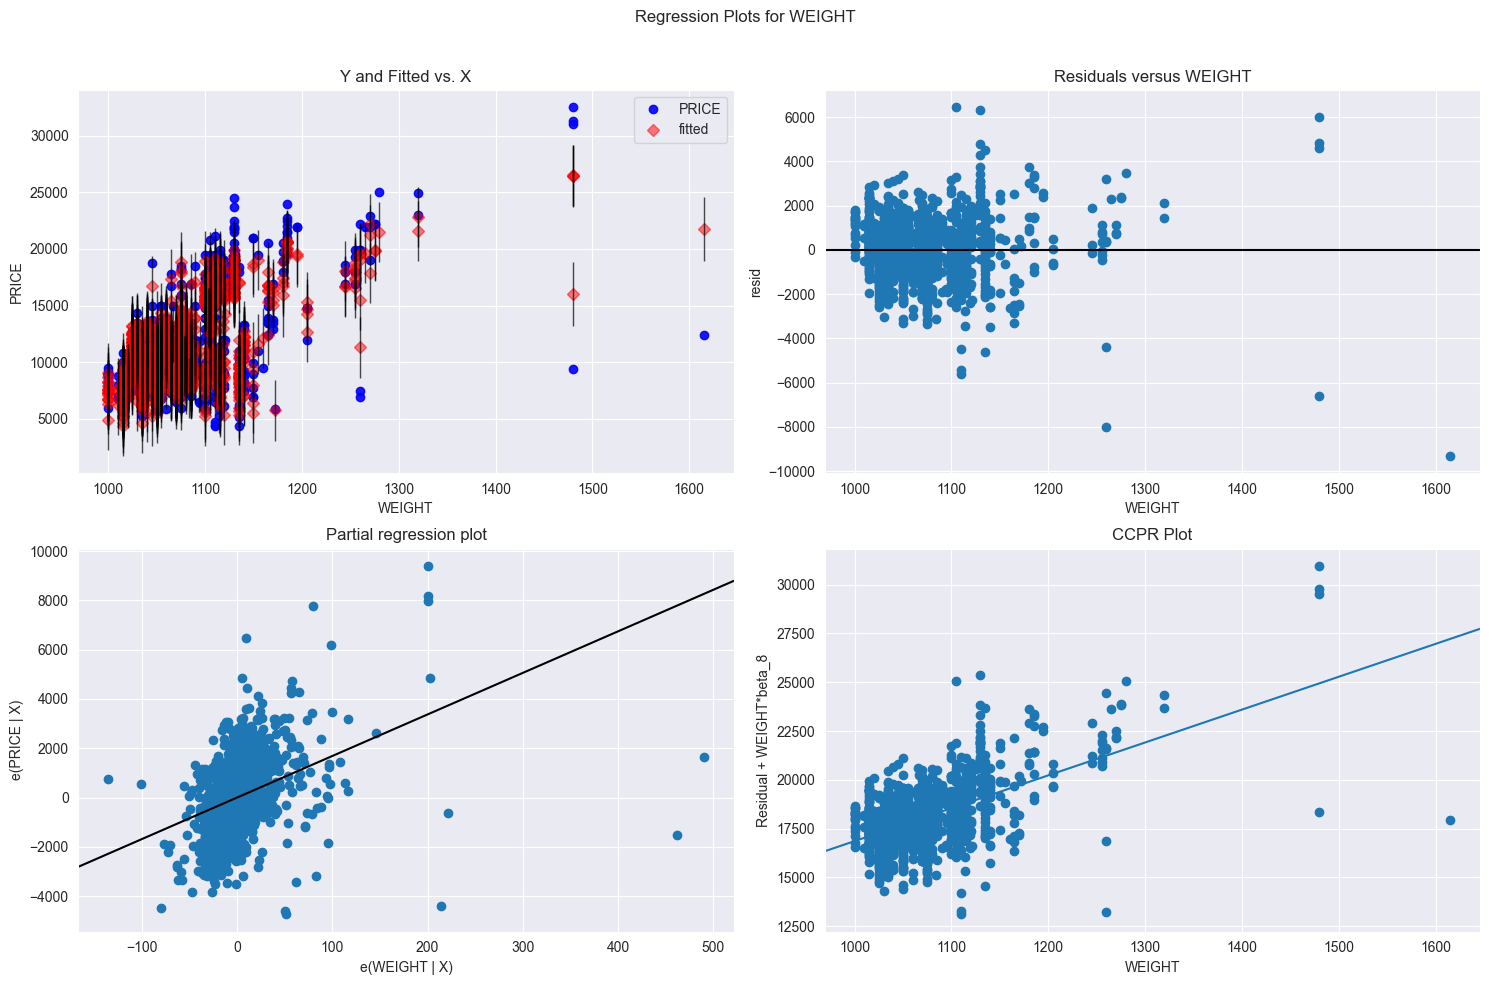

In [552]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(tc_model,'WEIGHT',fig=fig)
plt.show()

### **Model Deletion Diagnostics**

#### ***Detecting Influencers/Outliers***

#### ***1. Cook's Distance***
> If Cook's Distance > 1 then it is an outlier

In [553]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = tc_model.get_influence() # this method will return 2 values: cook's distance and p-value.
(c, _) = model_influence.cooks_distance # we don't need p-value so we placed _ here. That is temporary place holder.
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

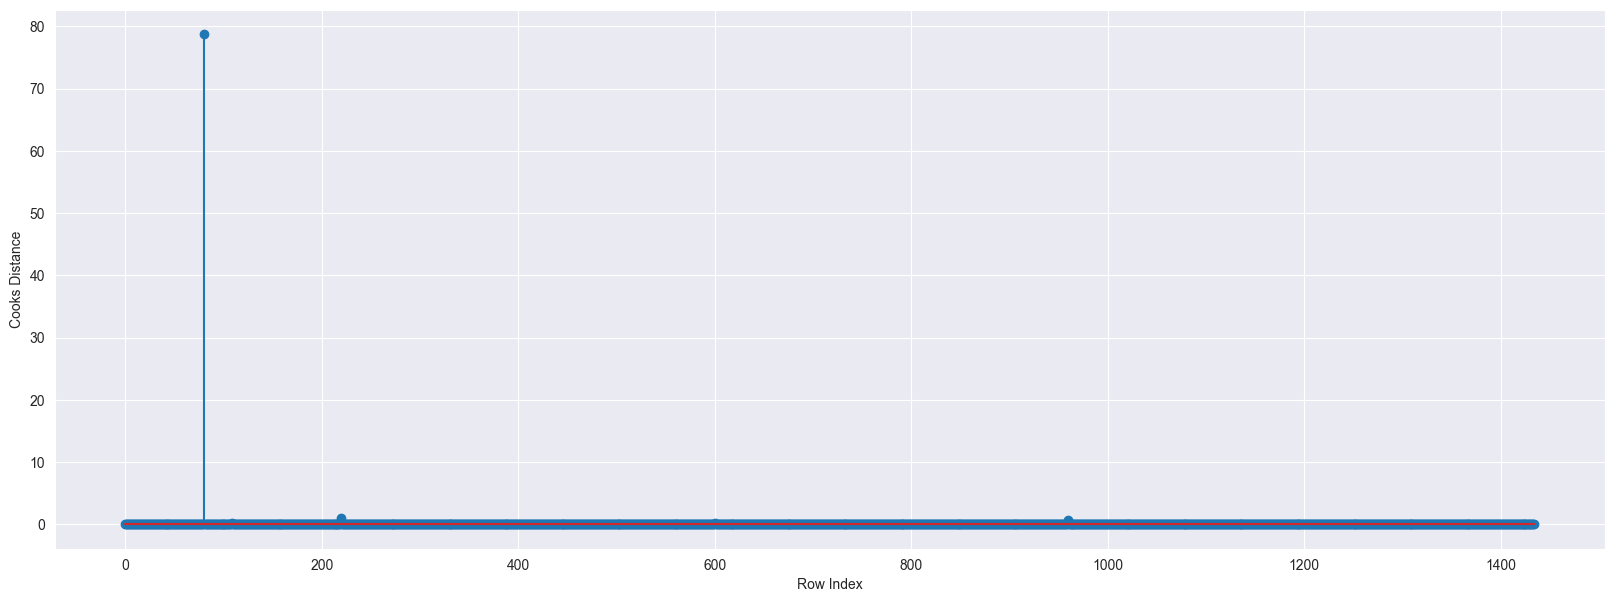

In [554]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(tc_data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [555]:
#index and value of influencer where c is more than 1.
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1.
(np.argmax(c),np.max(c)) # argmax() gives index value of max value in dataset
# 78.7295058225869 is cook's distance for index 80

(80, 78.7295058225869)

#### ***2. High Influence points***

In [556]:
tc_data.shape

(1435, 9)

In [557]:
tc_data.shape[1]

9

In [558]:
k = tc_data.shape[1] # k is no of variables as 9
n = tc_data.shape[0] # no of data points as 1435
leverage_cutoff = 3*((k + 1))/n
leverage_cutoff

0.020905923344947737

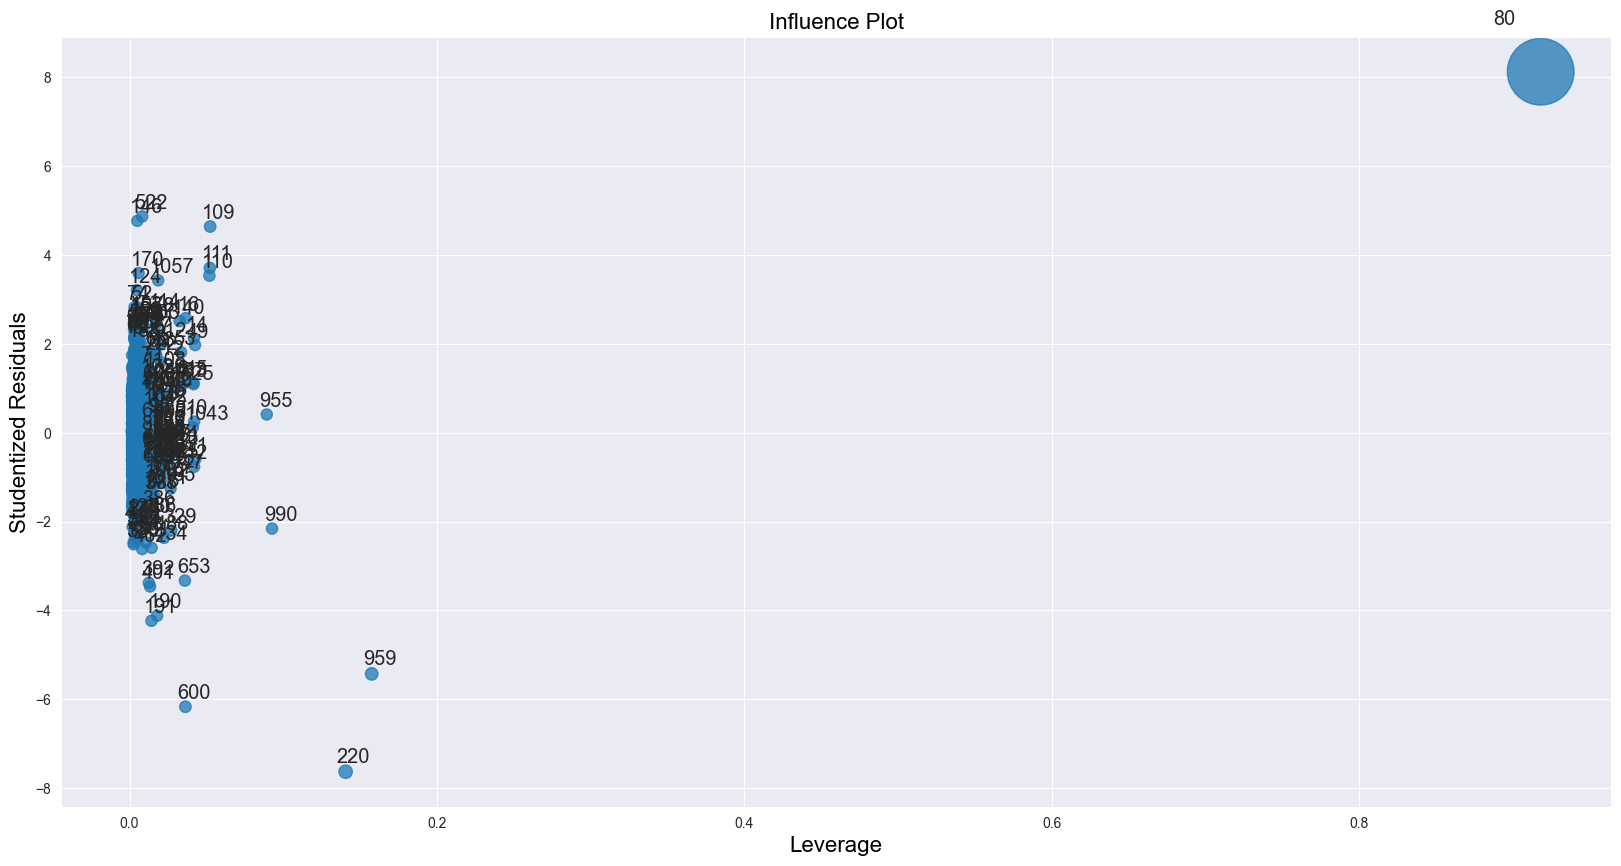

In [559]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(20,10))
fig=influence_plot(tc_model,ax = ax)


    From the above plot, it is evident that data point 80 is the influencer

In [560]:
tc_data[tc_data.index.isin([80])]

PRICE  AGE     KM   HP     CC  DOORS  GEARS  Q_TAX  WEIGHT
80  18950   25  20019  110  16000      5      5    100    1180

In [561]:
# See the differences in CC and other variable values like KM
tc_data.head()

PRICE  AGE     KM  HP    CC  DOORS  GEARS  Q_TAX  WEIGHT
0  13500   23  46986  90  2000      3      5    210    1165
1  13750   23  72937  90  2000      3      5    210    1165
2  13950   24  41711  90  2000      3      5    210    1165
3  14950   26  48000  90  2000      3      5    210    1165
4  13750   30  38500  90  2000      3      5    210    1170

### **Improving the model**

In [562]:
# Taking a backup by creating a copy of the data frame having the necessary columns
tc_data_new = tc_data.copy(deep=True)
tc_data_new

PRICE  AGE     KM   HP    CC  DOORS  GEARS  Q_TAX  WEIGHT
0     13500   23  46986   90  2000      3      5    210    1165
1     13750   23  72937   90  2000      3      5    210    1165
2     13950   24  41711   90  2000      3      5    210    1165
3     14950   26  48000   90  2000      3      5    210    1165
4     13750   30  38500   90  2000      3      5    210    1170
...     ...  ...    ...  ...   ...    ...    ...    ...     ...
1430   7500   69  20544   86  1300      3      5     69    1025
1431  10845   72  19000   86  1300      3      5     69    1015
1432   8500   71  17016   86  1300      3      5     69    1015
1433   7250   70  16916   86  1300      3      5     69    1015
1434   6950   76      1  110  1600      5      5     19    1114

[1435 rows x 9 columns]

In [563]:
# Discarding the data points which are influencers and reassigning the row numbers (reset_index(drop=True))
tc_data_temp=tc_data_new.drop(tc_data_new.index[[80]],axis=0).reset_index(drop=True)
tc_data_new = tc_data_temp
tc_data_new

PRICE  AGE     KM   HP    CC  DOORS  GEARS  Q_TAX  WEIGHT
0     13500   23  46986   90  2000      3      5    210    1165
1     13750   23  72937   90  2000      3      5    210    1165
2     13950   24  41711   90  2000      3      5    210    1165
3     14950   26  48000   90  2000      3      5    210    1165
4     13750   30  38500   90  2000      3      5    210    1170
...     ...  ...    ...  ...   ...    ...    ...    ...     ...
1429   7500   69  20544   86  1300      3      5     69    1025
1430  10845   72  19000   86  1300      3      5     69    1015
1431   8500   71  17016   86  1300      3      5     69    1015
1432   7250   70  16916   86  1300      3      5     69    1015
1433   6950   76      1  110  1600      5      5     19    1114

[1434 rows x 9 columns]

In [564]:
tc_data.describe()

PRICE          AGE             KM           HP            CC  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             DOORS        GEARS        Q_TAX       WEIGHT  
count  1435.000000  1435.000000  1435.000000  1435.000000  
mean      4.032753     5.026481    87.020209  1072.287108  
std       0.952667     0.188575    40.959588    52.251882  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

In [565]:
tc_data_new.describe()

PRICE          AGE             KM           HP           CC  \
count   1434.000000  1434.000000    1434.000000  1434.000000  1434.000000   
mean   10715.177127    56.002092   68605.640865   101.486053  1566.502789   
std     3603.436230    18.551732   37482.220175    14.984948   186.960827   
min     4350.000000     1.000000       1.000000    69.000000  1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000  1400.000000   
50%     9900.000000    61.000000   63455.000000   110.000000  1600.000000   
75%    11950.000000    70.000000   87062.250000   110.000000  1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  2000.000000   

             DOORS        GEARS        Q_TAX       WEIGHT  
count  1434.000000  1434.000000  1434.000000  1434.000000  
mean      4.032078     5.026499    87.011158  1072.211994  
std       0.952656     0.188639    40.972442    52.192552  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

In [566]:
tc_data.shape

(1435, 9)

In [567]:
tc_data_new.shape # One record less after removing one row

(1434, 9)

In [568]:
tc_data_new.shape[1]

9

In [569]:
k = tc_data_new.shape[1] # k is no of variables as 9
n = tc_data_new.shape[0] # no of data points as 1434
leverage_cutoff = 3*((k + 1))/n
leverage_cutoff


0.02092050209205021

In [570]:
import statsmodels.api as sm
tc_model_new = smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=tc_data_new).fit() # model.resid is error

##### ***Checking Cooks Distance after removing Outliers***

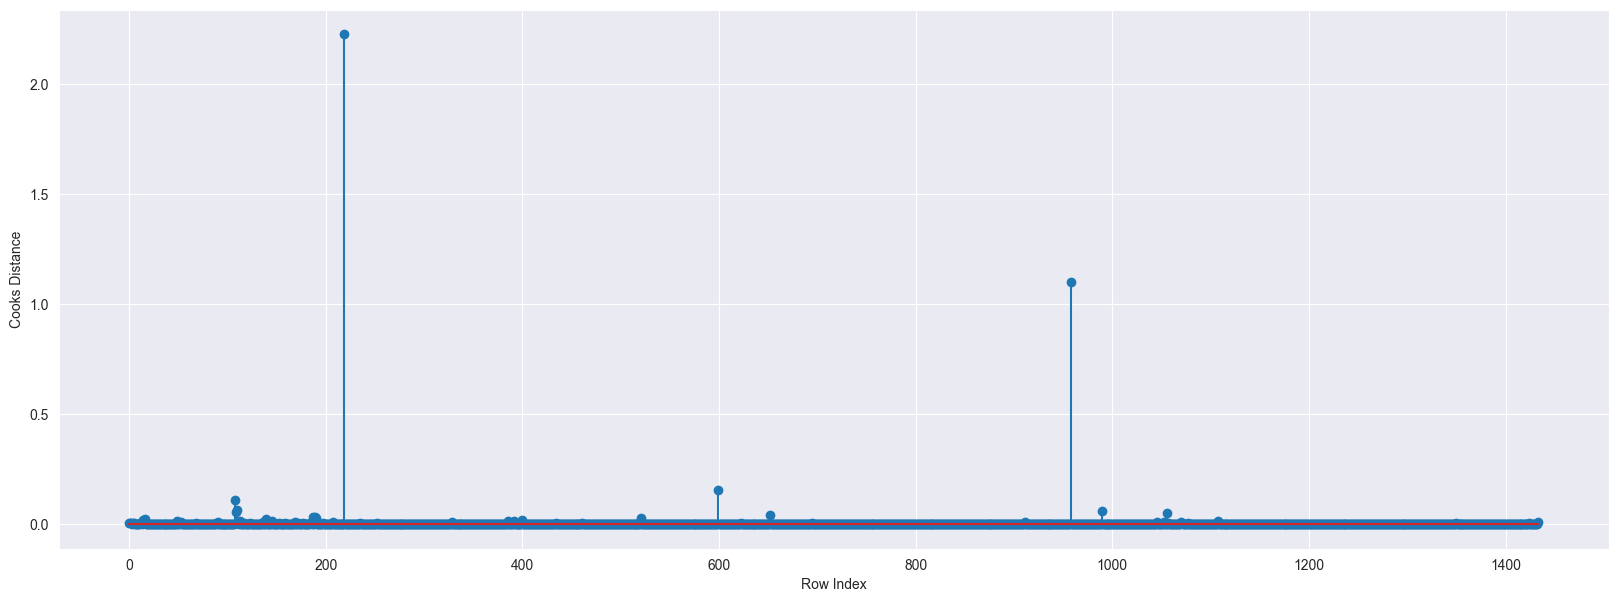

In [571]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = tc_model_new.get_influence() # this method will return 2 values: cook's distance and p-value.
(c, _) = model_influence.cooks_distance # we don't need p-value so we placed _ here. That is temporary place holder.

# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(tc_data_new)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

#### ***Checking Influence Points after removing Outliers***

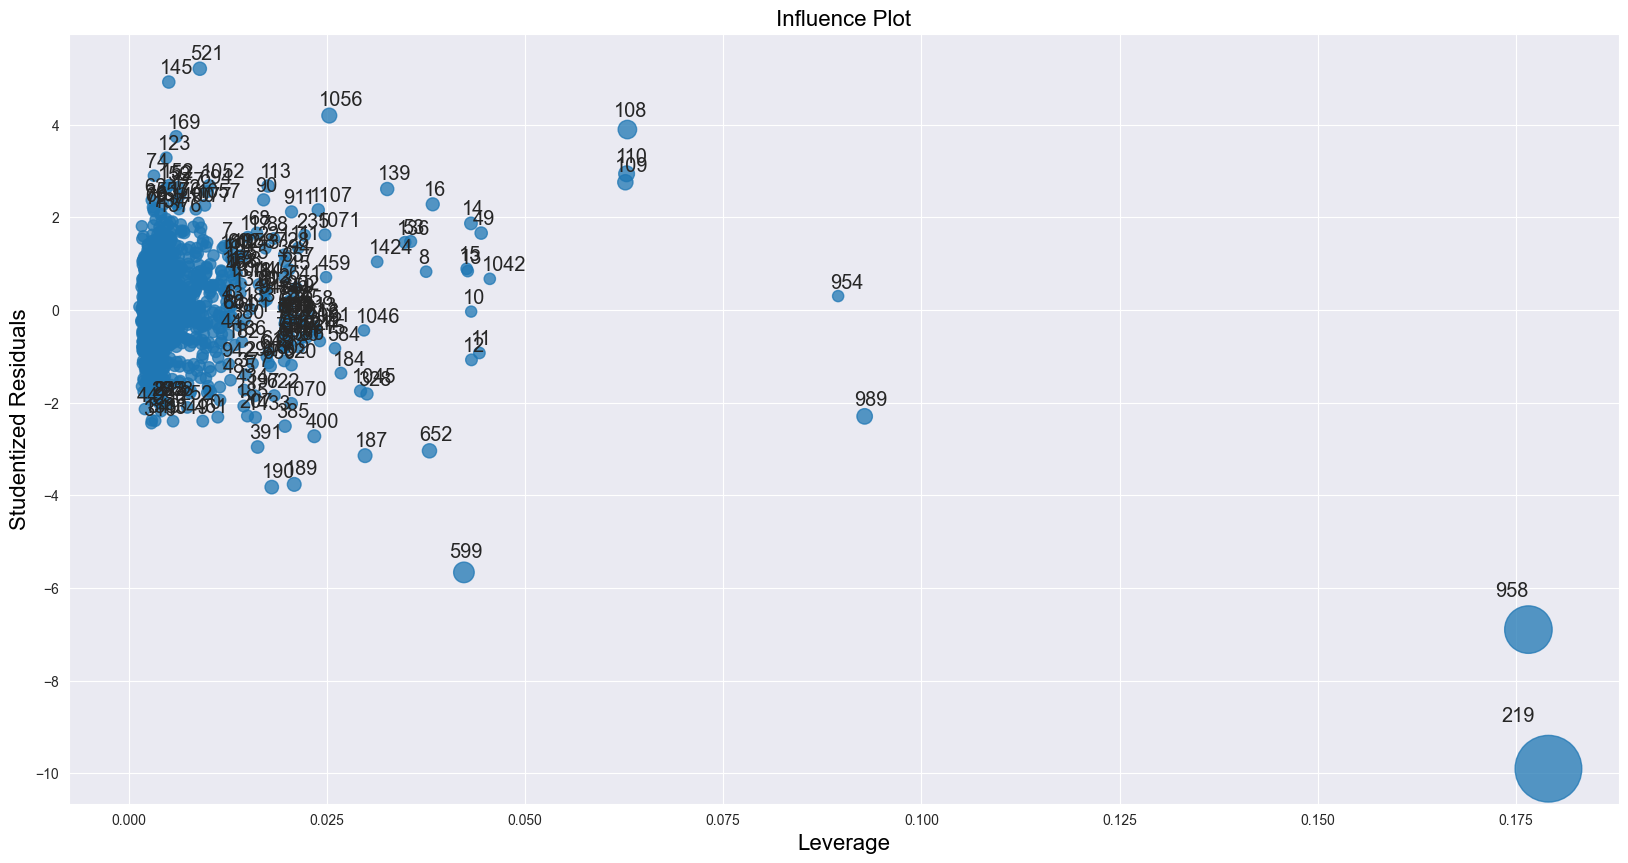

In [572]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(20,10))
fig=influence_plot(tc_model_new,ax = ax)

In [573]:
# Based on QQ Plot and Influence Points Chart, we can see that Points 958 and 219 are the influencers
# Both these points are showing high Cooks Distance of > 1.0 (The acceptable value range)

#index and value of influencer where c is more than 1.
#The Cook's distance is considered high if it is greater than  1.
(np.argmax(c),np.max(c)) # argmax() gives index value of max value in dataset
# 2.2253513655271333 is cook's distance for index 219


(219, 2.2253513655271333)

In [574]:
tc_data_new[tc_data_new.index.isin([219,958])]

PRICE  AGE     KM   HP    CC  DOORS  GEARS  Q_TAX  WEIGHT
219  12450   44  74172  110  1600      5      5    163    1615
958   9390   66  50806   86  1300      3      5     19    1480

In [575]:
tc_data_new.head() # We do see a values for the above data points i.e., 219 and 958 vary a lot when compared to the top values for the dataframe tc_data_new

PRICE  AGE     KM  HP    CC  DOORS  GEARS  Q_TAX  WEIGHT
0  13500   23  46986  90  2000      3      5    210    1165
1  13750   23  72937  90  2000      3      5    210    1165
2  13950   24  41711  90  2000      3      5    210    1165
3  14950   26  48000  90  2000      3      5    210    1165
4  13750   30  38500  90  2000      3      5    210    1170

In [576]:
# Discarding the data points 219 and 958, which are influencers and reassigning the row numbers (reset_index(drop=True))
tc_data_temp2=tc_data_new.drop(tc_data_new.index[[219,958]],axis=0).reset_index(drop=True)
tc_data_new2 = tc_data_temp2

#### **Regenerating the Model and cross checking for any influencers**

In [577]:
# Recreating the model and checking for any remaining influencers (if any)

import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

tc_model_new2 = smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=tc_data_new2).fit() # model.resid is error


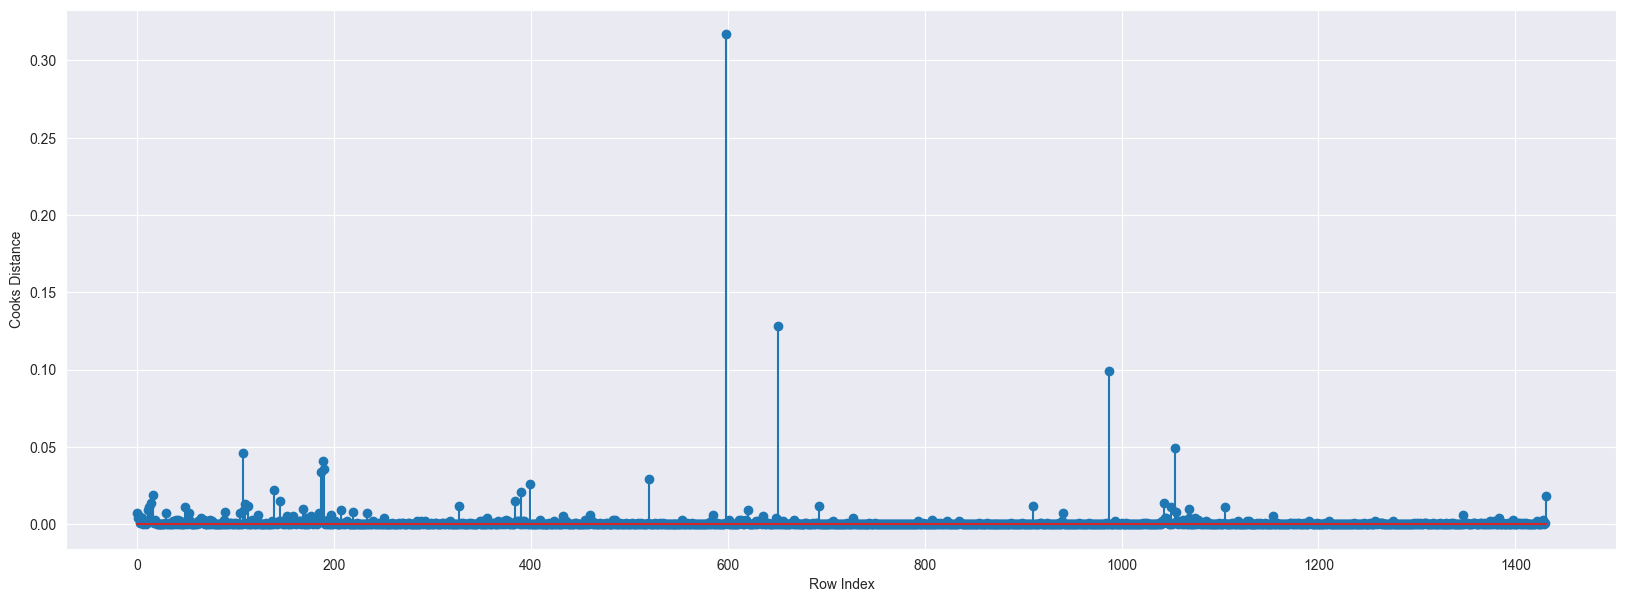

In [578]:
# Getting cooks distance and influencers points
model_influence = tc_model_new2.get_influence() # this method will return 2 values: cook's distance and p-value.
(c, _) = model_influence.cooks_distance # we don't need p-value so we placed _ here. That is temporary place holder.

# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(tc_data_new2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [579]:
(np.argmax(c),np.max(c)) # argmax() gives index value of max value in dataset
# 0.31689035401463655 is cook's distance for index 598
# Since the value is lesser than 1, we can stop the diagnostic process and finalize the model

(598, 0.31689035401463655)

##### ****Since the value is <1 , we can stop the diagnostic process and finalize the model****

#### **The Final DataFrame and Final Data Model**

In [580]:
# The final dataframe
final_tc_data = tc_data_new2.copy(deep=True)
final_tc_data[1:5]

PRICE  AGE     KM  HP    CC  DOORS  GEARS  Q_TAX  WEIGHT
1  13750   23  72937  90  2000      3      5    210    1165
2  13950   24  41711  90  2000      3      5    210    1165
3  14950   26  48000  90  2000      3      5    210    1165
4  13750   30  38500  90  2000      3      5    210    1170

In [581]:
# The final data model is tc_model_new2
final_model = smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=final_tc_data).fit()

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:30:17   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
AGE         -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM            -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP            36.5587      2.747     13.308      0.000      31.170      41.947
CC            -3.7852      0.303    -12.508      0.000      -4.379      -3.192
DOORS       -121.9808     37.498     -3.253      0.001    -195.539     -48.423
GEARS        466.6014    181.031      2.577      0.010     111.485     821.718
Q_TAX          5.1754      1.373      3.770      0.000       2.482       7.869
WEIGHT        30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [582]:
# The final rsquared and aic value
(final_model.rsquared,final_model.aic)

(0.8839684606741537, 24453.23573612724)

In [583]:
final_model.params

Intercept   -14682.483085
AGE           -112.062887
KM              -0.016971
HP              36.558721
CC              -3.785187
DOORS         -121.980785
GEARS          466.601420
Q_TAX            5.175394
WEIGHT          30.566656
dtype: float64

In [584]:
final_tc_data.head()

PRICE  AGE     KM  HP    CC  DOORS  GEARS  Q_TAX  WEIGHT
0  13500   23  46986  90  2000      3      5    210    1165
1  13750   23  72937  90  2000      3      5    210    1165
2  13950   24  41711  90  2000      3      5    210    1165
3  14950   26  48000  90  2000      3      5    210    1165
4  13750   30  38500  90  2000      3      5    210    1170

In [585]:
# Creating Prediction_Model column with 88% accuracy which is a good model
final_tc_data['Predicted_Y'] = final_model.predict(final_tc_data)
final_tc_data[0:5]

PRICE  AGE     KM  HP    CC  DOORS  GEARS  Q_TAX  WEIGHT   Predicted_Y
0  13500   23  46986  90  2000      3      5    210    1165  16326.634426
1  13750   23  72937  90  2000      3      5    210    1165  15886.220972
2  13950   24  41711  90  2000      3      5    210    1165  16304.093367
3  14950   26  48000  90  2000      3      5    210    1165  15973.237208
4  13750   30  38500  90  2000      3      5    210    1170  15839.043084

### **Predicting for new data**

In [586]:
# New data for prediction - what will be Price be for the following values?
new_data=pd.DataFrame({'AGE':30,"KM":25544,"HP":75,"CC":1850,"DOORS":4,"GEARS":5,"Q_TAX":199,"WEIGHT":1210},index=[0])
new_data

AGE     KM  HP    CC  DOORS  GEARS  Q_TAX  WEIGHT
0   30  25544  75  1850      4      5    199    1210

In [587]:
# Prediction with 88.4% accuracy
final_model.predict(new_data)

0    17122.072255
dtype: float64

### **Creation of a model with a specific accuracy 'final_model_spec_acc'**

- In order to do so, we will need to run the same steps as listed earlier to find the records with the maximum influencers.
- This step will take multiple steps and so we will need to program the same in order to achieve the desired result.

In [588]:
# Coping the dataframe from 'final_tc_data' for the first time as 'final_model_SPA'. Subsequently that will be done within the 'while loop block' after removing the outliers.
final_data_SPA = final_tc_data.copy(deep=True) # Here SA implies with Specific Percentage Accuracy. 

# Similarly initializing the model 'final_data_spec_acc'. Subsequently it will be done within the 'while loop block'.
final_model_SPA=smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=final_data_SPA).fit()

# Intializing the number of records dropped. Until now 3 records have been dropped and will increment in the 'while loop block'
records_dropped = 3

while final_model_SPA.rsquared < 0.90:
    for c in [np.max(c) > 0.5]:
        final_model_SA=smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=final_data_SPA).fit()
        (c,_)=final_model_SPA.get_influence().cooks_distance
        print('Dropping the record with index', np.argmax(c))
        final_data_SPA=final_data_SPA.drop(final_data_SPA.index[[np.argmax(c)]],axis=0)
        records_dropped += 1
    else:
        final_model_SPA=smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+Q_TAX+WEIGHT',data=final_data_SPA).fit()
        print("UPDATED PERCENTAGE ACCURACY IS:",np.round(final_model_SPA.rsquared,4),"and AIC IS:", np.round(final_model_SPA.aic,4))

print("\n\nTHE TOTAL NUMBER OF RECORDS DROPPED ARE:", records_dropped)
final_data_SPA=final_data_SPA.reset_index(drop=True)

Dropping the record with index 598
UPDATED PERCENTAGE ACCURACY IS: 0.8882 and AIC IS: 24382.7076
Dropping the record with index 650
UPDATED PERCENTAGE ACCURACY IS: 0.8903 and AIC IS: 24339.5363
Dropping the record with index 985
UPDATED PERCENTAGE ACCURACY IS: 0.891 and AIC IS: 24313.377
Dropping the record with index 189
UPDATED PERCENTAGE ACCURACY IS: 0.8923 and AIC IS: 24277.5049
Dropping the record with index 1050
UPDATED PERCENTAGE ACCURACY IS: 0.8934 and AIC IS: 24246.8336
Dropping the record with index 189
UPDATED PERCENTAGE ACCURACY IS: 0.8947 and AIC IS: 24209.8975
Dropping the record with index 397
UPDATED PERCENTAGE ACCURACY IS: 0.8955 and AIC IS: 24180.5425
Dropping the record with index 108
UPDATED PERCENTAGE ACCURACY IS: 0.893 and AIC IS: 24161.248
Dropping the record with index 387
UPDATED PERCENTAGE ACCURACY IS: 0.894 and AIC IS: 24129.7051
Dropping the record with index 515
UPDATED PERCENTAGE ACCURACY IS: 0.8954 and AIC IS: 24088.7176
Dropping the record with index 186

Dropping the record with index 1046
UPDATED PERCENTAGE ACCURACY IS: 0.8907 and AIC IS: 23532.0529
Dropping the record with index 365
UPDATED PERCENTAGE ACCURACY IS: 0.891 and AIC IS: 23511.7235
Dropping the record with index 587
UPDATED PERCENTAGE ACCURACY IS: 0.8913 and AIC IS: 23490.3367
Dropping the record with index 1118
UPDATED PERCENTAGE ACCURACY IS: 0.8918 and AIC IS: 23466.291
Dropping the record with index 561
UPDATED PERCENTAGE ACCURACY IS: 0.8927 and AIC IS: 23439.6787
Dropping the record with index 628
UPDATED PERCENTAGE ACCURACY IS: 0.8929 and AIC IS: 23420.4419
Dropping the record with index 1344
UPDATED PERCENTAGE ACCURACY IS: 0.8933 and AIC IS: 23397.6546
Dropping the record with index 154
UPDATED PERCENTAGE ACCURACY IS: 0.8937 and AIC IS: 23361.61
Dropping the record with index 1013
UPDATED PERCENTAGE ACCURACY IS: 0.8945 and AIC IS: 23335.1427
Dropping the record with index 60
UPDATED PERCENTAGE ACCURACY IS: 0.8938 and AIC IS: 23315.1256
Dropping the record with index 

In [589]:
# Prediction_Y with 90.02% accuracy
pred_y=final_model_SPA.predict(final_data_SPA)
pred_y

0       15329.991147
1       15702.428929
2       15389.233919
3       15287.734792
4       14725.017923
            ...     
1326     7604.954881
1327     9203.051136
1328     8532.098968
1329     8670.833903
1330     8780.570061
Length: 1331, dtype: float64

In [590]:
# Prediction of new data 'new_data' with 90.02% accuracy
final_model_SPA.predict(new_data) # 17175.065208 with 90% accuracy Vs 17122.072255 with 88.4% accuracy

0    17175.065208
dtype: float64

## ***50 STARTUPS DATA***
- Creation the best model to predict th Profit.
- Creating a table containing R Squared value for each Predicted Model
### Considering only the below columns-
"R&D Spend", "Administration", "Marketing Spend", "State", "Profit"

File : 50_Startups.csv

In [591]:
# import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

### **Importing data from file 50_Startups.csv**

In [592]:
# Reading the data from the file '50_Startups.csv'
SU_50_orig_data = pd.read_csv("50_Startups.csv")
SU_50_orig_data.head()


R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

### **EDA (Exploratory Data Analysis)**

In [593]:
SU_50_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### *Checking for missing values*

In [594]:
# check for missing values
SU_50_orig_data.isna().sum() # The result shows that there are no missing values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### *Checking for Null Values*

In [595]:
# Checking to see if there are any null values
# We can get this information using SU_50_orig_data.info() option as well
SU_50_orig_data.isnull().sum() # The result shows that there are no null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### *Checking the data structure*

In [596]:
# Data Structure
print(type(SU_50_orig_data))
print(SU_50_orig_data.shape)

<class 'pandas.core.frame.DataFrame'>
(50, 5)


In [597]:
# data types
SU_50_orig_data.dtypes # check data types of all variables

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

#### *Checking for Duplicates*

In [598]:
# Checking for Duplicate Values
SU_50_orig_data.duplicated()  # if any 2 rows has same values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [599]:
# Count of duplicated rows
SU_50_orig_data[SU_50_orig_data.duplicated()].shape # We see that there are no duplicates indicated by 0 rows and 5 columns

(0, 5)

In [600]:
# Print the duplicated rows. Since we don't have any duplicates it will not show anything
SU_50_orig_data[SU_50_orig_data.duplicated()]

Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, State, Profit]
Index: []

In [601]:
SU_50_orig_data.shape

(50, 5)

In [602]:
SU_50_orig_data[0:5]

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

#### *Rename Columns*

In [603]:
# Renaming 'Delivery Time' to 'Delivery_Time' and 'Sorting Time' to 'Sorting_Time', removing the space in between
SU_50_orig_data.rename(columns = {'R&D Spend':'RnD_SPEND','Administration':'ADMIN_SPEND', 'Marketing Spend':'MARKETING_SPEND', 'State':'STATE', 'Profit':'PROFIT'}, inplace = True)
SU_50_orig_data.head


<bound method NDFrame.head of     RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND       STATE     PROFIT
0   165349.20    136897.80        471784.10    New York  192261.83
1   162597.70    151377.59        443898.53  California  191792.06
2   153441.51    101145.55        407934.54     Florida  191050.39
3   144372.41    118671.85        383199.62    New York  182901.99
4   142107.34     91391.77        366168.42     Florida  166187.94
5   131876.90     99814.71        362861.36    New York  156991.12
6   134615.46    147198.87        127716.82  California  156122.51
7   130298.13    145530.06        323876.68     Florida  155752.60
8   120542.52    148718.95        311613.29    New York  152211.77
9   123334.88    108679.17        304981.62  California  149759.96
10  101913.08    110594.11        229160.95     Florida  146121.95
11  100671.96     91790.61        249744.55  California  144259.40
12   93863.75    127320.38        249839.44     Florida  141585.52
13   91992.39    135495.07      

In [604]:
SU_50_orig_data[0:5]

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND       STATE     PROFIT
0  165349.20    136897.80        471784.10    New York  192261.83
1  162597.70    151377.59        443898.53  California  191792.06
2  153441.51    101145.55        407934.54     Florida  191050.39
3  144372.41    118671.85        383199.62    New York  182901.99
4  142107.34     91391.77        366168.42     Florida  166187.94

In [605]:
# Coping the dataframe from 'SU_50_orig_data' as 'SU_50_data'. To retain a backup of the original data
SU_50_data = SU_50_orig_data.copy(deep=True)

#### *Dropping the 'state' column as it is non-numeric and is not required for the model creation*

In [606]:
# Coping the dataframe from 'SU_50_orig_data' as 'SU_50_data', except the 'STATE' column. This will also retain a backup of the original data
SU_50_data = SU_50_orig_data[['RnD_SPEND','ADMIN_SPEND', 'MARKETING_SPEND', 'PROFIT']]
SU_50_data[0:5]

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND     PROFIT
0  165349.20    136897.80        471784.10  192261.83
1  162597.70    151377.59        443898.53  191792.06
2  153441.51    101145.55        407934.54  191050.39
3  144372.41    118671.85        383199.62  182901.99
4  142107.34     91391.77        366168.42  166187.94

### **Outlier Detection**

<Axes: xlabel='RnD_SPEND', ylabel='Count'>

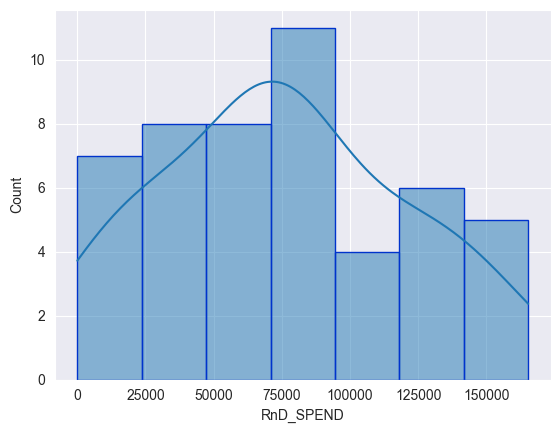

In [607]:
sns.histplot(data=SU_50_data['RnD_SPEND'].value_counts(), edgecolor='#0033cc', x="RnD_SPEND", kde=True)

<Axes: xlabel='ADMIN_SPEND', ylabel='Count'>

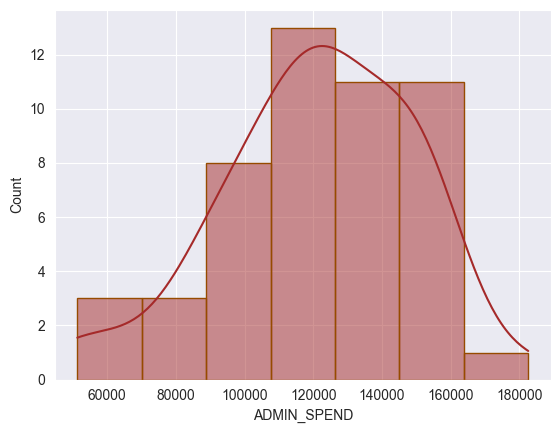

In [608]:
sns.histplot(data=SU_50_data['ADMIN_SPEND'].value_counts(), x="ADMIN_SPEND", color='brown', edgecolor='#964B00', kde=True)


<Axes: xlabel='MARKETING_SPEND', ylabel='Count'>

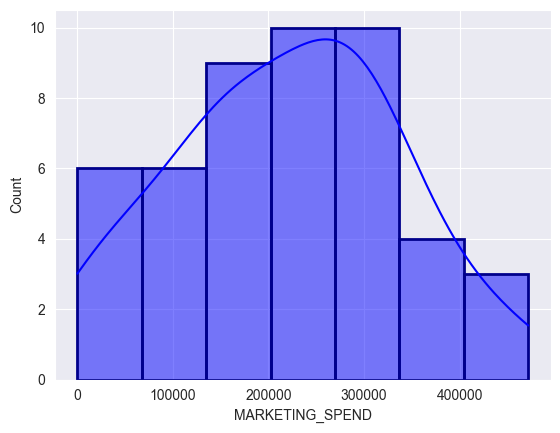

In [609]:

sns.histplot(data=SU_50_data['MARKETING_SPEND'].value_counts(), x="MARKETING_SPEND", color='blue', edgecolor='#00008b', linewidth=2, kde=True)


<Axes: xlabel='PROFIT', ylabel='Count'>

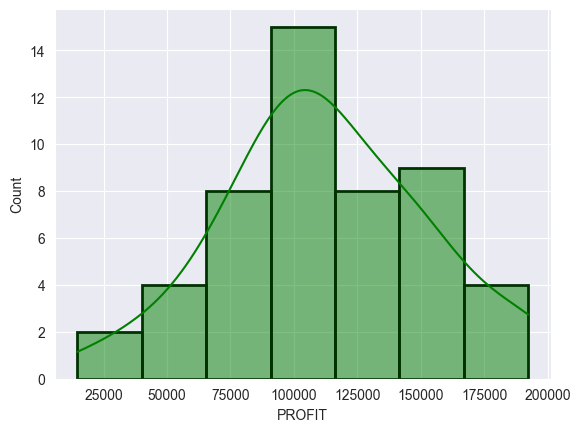

In [610]:

sns.histplot(data=SU_50_data['PROFIT'].value_counts(), x="PROFIT", color='green', edgecolor='#003200', linewidth=2, kde=True)

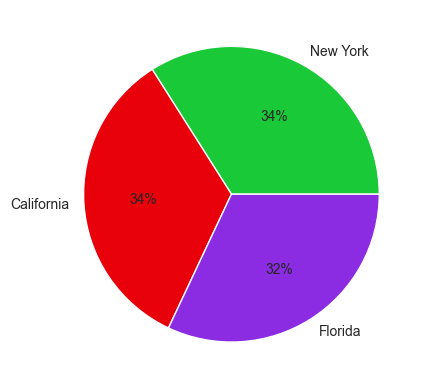

In [611]:
import matplotlib.pyplot as plt
import seaborn as sns

palette_color = sns.color_palette('bright')[2:7]
# Display state data in a form of Pie Graph
values = SU_50_orig_data['STATE'].value_counts().keys().tolist()
counts = SU_50_orig_data['STATE'].value_counts().tolist()
values, counts
plt.pie(SU_50_orig_data['STATE'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
plt.show()

<Axes: xlabel='PROFIT'>

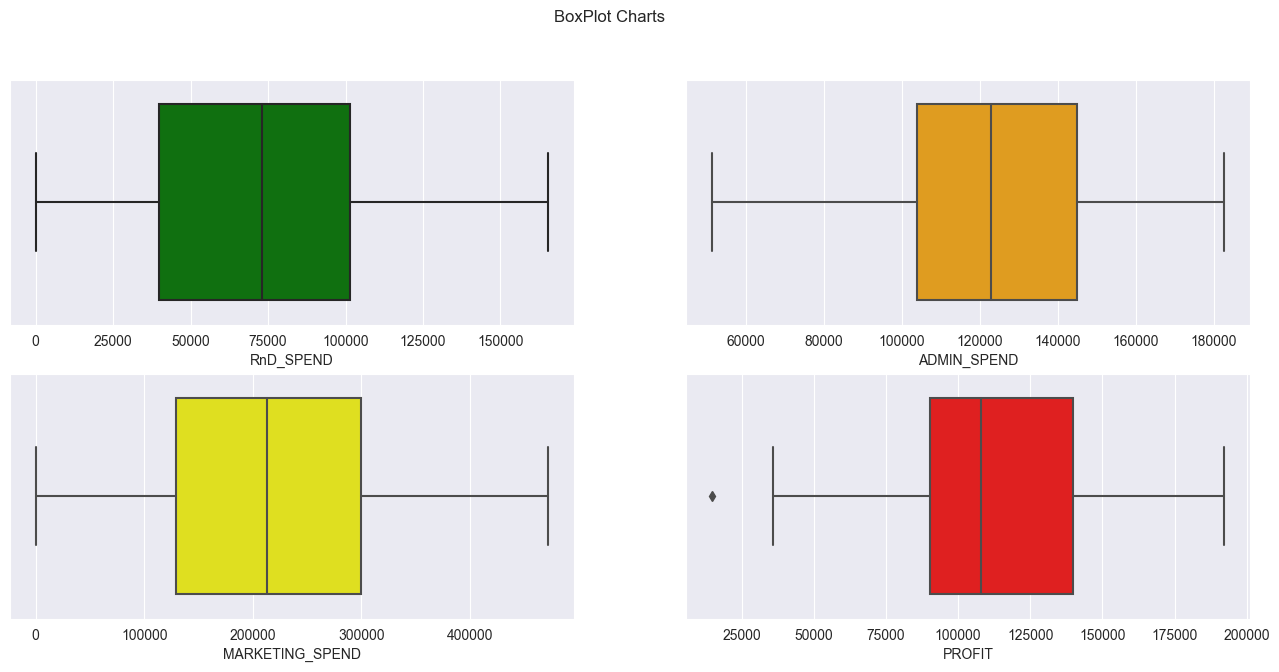

In [612]:
fig, axes = plt.subplots(2, 2, figsize=(16, 7), sharey=True)
fig.suptitle('BoxPlot Charts')
sns.boxplot(ax=axes[0, 0], data=SU_50_data, x='RnD_SPEND', color='green')
sns.boxplot(ax=axes[0, 1], data=SU_50_data, x='ADMIN_SPEND', color='orange')
sns.boxplot(ax=axes[1, 0], data=SU_50_data, x='MARKETING_SPEND', color='yellow')
sns.boxplot(ax=axes[1, 1], data=SU_50_data, x='PROFIT', color='red')

### **Correlation Matrix**
Check for Assumption: Independent variables are independent of each other


In [613]:
SU_50_data.corr()

# Based on the Correlation Matrix, we don't see any major correlation between any of the independent variables.
# We do see a high correlation between the independent variable R&D_SPEND and the dependent variable PROFIT.
# In other words, we don't see the issue with collinearity problem.

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND    PROFIT
RnD_SPEND         1.000000     0.241955         0.724248  0.972900
ADMIN_SPEND       0.241955     1.000000        -0.032154  0.200717
MARKETING_SPEND   0.724248    -0.032154         1.000000  0.747766
PROFIT            0.972900     0.200717         0.747766  1.000000

#### *Scatterplot between variables along with histograms*
Check for Assumption: Independent variables are independent of each other

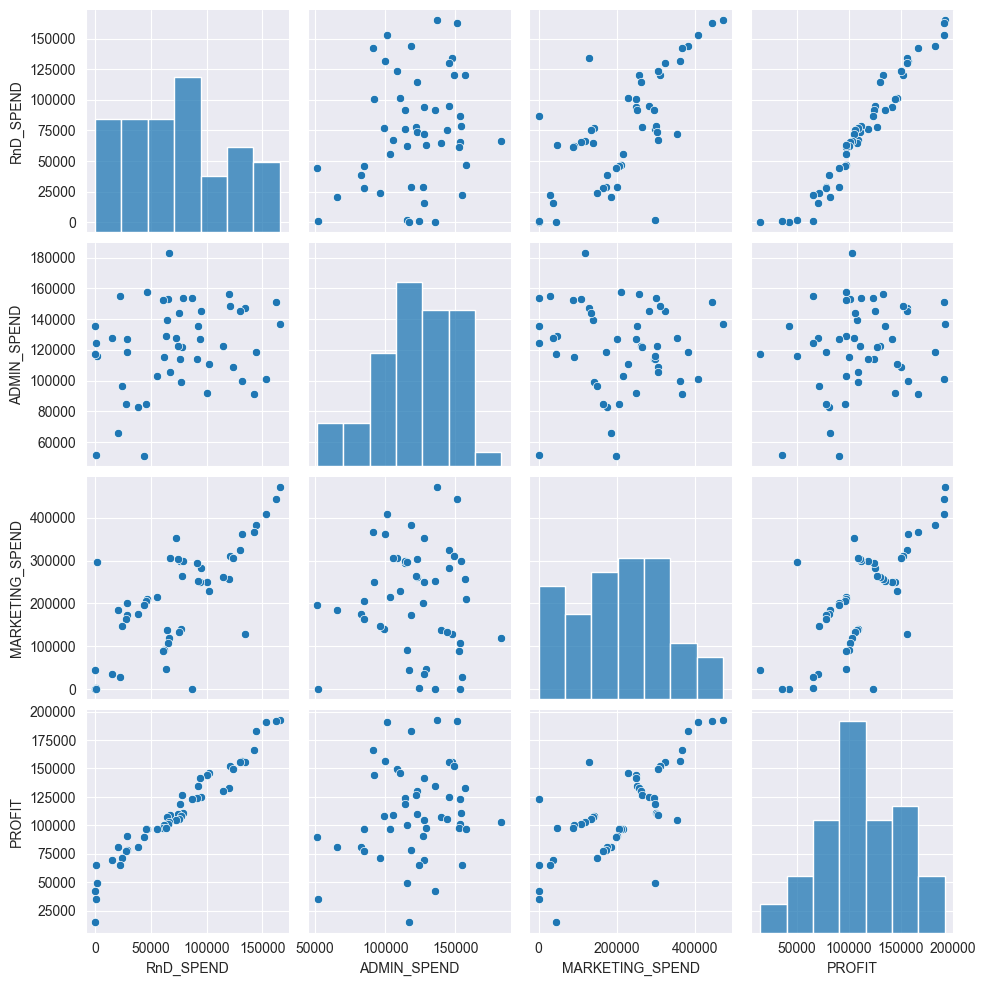

In [614]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(SU_50_data)

### **Preparing a model**

In [615]:
# Preparing a model
SU_50_model = smf.ols('PROFIT~RnD_SPEND+ADMIN_SPEND+MARKETING_SPEND',data=SU_50_data).fit() # excess varaiables can be joined using + symbol

In [616]:
#Coefficients Beta values
SU_50_model.params

Intercept          50122.192990
RnD_SPEND              0.805715
ADMIN_SPEND           -0.026816
MARKETING_SPEND        0.027228
dtype: float64

In [617]:
#t and p-Values: print(SU_50_model.tvalues,SU_50_model.pvalues)
print('*** t-values ***','\n',SU_50_model.tvalues, '\n','*** p-values ***','\n', np.round(SU_50_model.pvalues,5))
# p values shows that only DOORS and CC are insignificant. The rest are significant.

*** t-values *** 
 Intercept           7.626218
RnD_SPEND          17.846374
ADMIN_SPEND        -0.525507
MARKETING_SPEND     1.655077
dtype: float64 
 *** p-values *** 
 Intercept          0.00000
RnD_SPEND          0.00000
ADMIN_SPEND        0.60176
MARKETING_SPEND    0.10472
dtype: float64


In [618]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
# R squared value tells us how good model is.
(SU_50_model.rsquared,SU_50_model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

#### **Simple Linear Regression Models**

##### *Build Simple Linear Regression and Multiple Linear Regression models for the insignificant variables 'CC' and 'DOORS'*

In [619]:
slr_rnd_s=smf.ols('PROFIT~RnD_SPEND',data=SU_50_data).fit()  # Simple Linear Regression model for PROFIT Vs RnD_SPEND alone
# t and p-Values
print(slr_rnd_s.tvalues, '\n', slr_rnd_s.pvalues)
# The p-value is 3.500322e-32 which is approx. = 0, and less than alpha i.e., 0.05 so RnD_SPEND variable is significant

Intercept    19.320288
RnD_SPEND    29.151139
dtype: float64 
 Intercept    2.782697e-24
RnD_SPEND    3.500322e-32
dtype: float64


In [620]:
slr_admin_s=smf.ols('PROFIT~ADMIN_SPEND',data=SU_50_data).fit()  # Simple Linear Regression model for PROFIT Vs ADMIN_SPEND alone
# t and p-Values
print(slr_admin_s.tvalues, '\n', slr_admin_s.pvalues)
# here p-value 0.162217 is higher than alpha i.e., 0.05 so ADMIN_SPEND variable is not significant i.e. insignificant

Intercept      3.040044
ADMIN_SPEND    1.419493
dtype: float64 
 Intercept      0.003824
ADMIN_SPEND    0.162217
dtype: float64


In [621]:
slr_marketing_s=smf.ols('PROFIT~ADMIN_SPEND+MARKETING_SPEND',data=SU_50_data).fit()  # Simple Linear Regression model for PROFIT Vs ADMIN_SPEND and MARKETING_SPEND alone
# t and p-Values
print(slr_marketing_s.tvalues, '\n', slr_marketing_s.pvalues)
# The p-value of both ADMIN_SPEND and MARKETING_SPEND are 1.729198e-02 and 9.727245e-11 which are both less than alpha i.e., 0.05
# Both ADMIN_SPEND and MARKETING_SPEND variables are significant

Intercept          1.142741
ADMIN_SPEND        2.467779
MARKETING_SPEND    8.281039
dtype: float64 
 Intercept          2.589341e-01
ADMIN_SPEND        1.729198e-02
MARKETING_SPEND    9.727245e-11
dtype: float64


### **Model Validation Techniques**
##### ***1. Collinearity Check***

In [622]:
# 1) Collinearity Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_rnd_s=smf.ols('RnD_SPEND~ADMIN_SPEND+MARKETING_SPEND',data=SU_50_data).fit().rsquared
vif_rnd_s=1/(1-rsq_rnd_s)

rsq_admin_s=smf.ols('ADMIN_SPEND~RnD_SPEND+MARKETING_SPEND',data=SU_50_data).fit().rsquared
vif_admin_s=1/(1-rsq_admin_s)

rsq_marketing_s=smf.ols('MARKETING_SPEND~RnD_SPEND+ADMIN_SPEND',data=SU_50_data).fit().rsquared
vif_marketing_s=1/(1-rsq_marketing_s)

# Storing vif values in a data frame
d1 = {'Variables':['RnD_SPEND','ADMIN_SPEND','MARKETING_SPEND'],'VIF':[vif_rnd_s,vif_admin_s,vif_marketing_s]}
su50_vif = pd.DataFrame(d1)
su50_vif

Variables       VIF
0        RnD_SPEND  2.468903
1      ADMIN_SPEND  1.175091
2  MARKETING_SPEND  2.326773

    - VIF equal to 1 = variables are not correlated
    - VIF between 1 and 5 = variables are moderately correlated 
    - VIF greater than 5 = variables are highly correlated

    The higher the VIF, the higher the possibility that multicollinearity exists, and further research is required. 

    When VIF is higher than 10, there is significant multicollinearity that needs to be corrected.

In our case the VIF values are moderately correlated and therefore this once again confirms that there is no multicollinearity issues

#### ***2.  Residual Analysis***

##### *Test for Normality of Residuals (Q-Q Plot)*

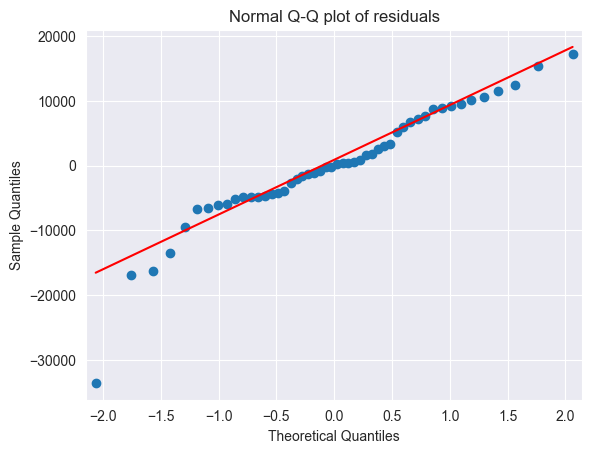

In [623]:
import statsmodels.api as sm
SU_50_model = smf.ols('PROFIT~RnD_SPEND+ADMIN_SPEND+MARKETING_SPEND',data=SU_50_data).fit() # model.resid is error
qqplot=sm.qqplot(SU_50_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals") # points that are away from line are outliers
plt.show() # Here some values are more than 6000 y-value and some below -6000

In [624]:
SU_50_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        14:30:34   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_SPEND           0.8057      0.045     17.846      0.000       0.715       0.897
ADMIN_SPEND        -0.0268      0.051     -0.526      0.602      -0.130       0.076
MARKETING_SPEND     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [625]:
# The rsquared and aic value
(SU_50_model.rsquared,SU_50_model.aic) # The model accuracy is at 95% and AIC is 1058.77

(0.9507459940683246, 1058.7714985998055)

In [626]:
# Loading the R-Squared value to a Table (Storing all R-Squared values for models created)
df1={'Models_Created':['Original'],'RSquared_Value':[SU_50_model.rsquared]}
table=pd.DataFrame(df1)
table

Models_Created  RSquared_Value
0       Original        0.950746

In [627]:
list(np.where(SU_50_model.resid < -30000))  # The outliers detected using the above QQ plot of residuals that are lesser than 30000

[array([49], dtype=int64)]

#### *Residual Plot for Homoscedasticity: Constant Variance*

In [628]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

# Function definition for standardization i.e. z score, Function name: get_standardized_values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() # This is z score = (Xi - mean)/std. dev.

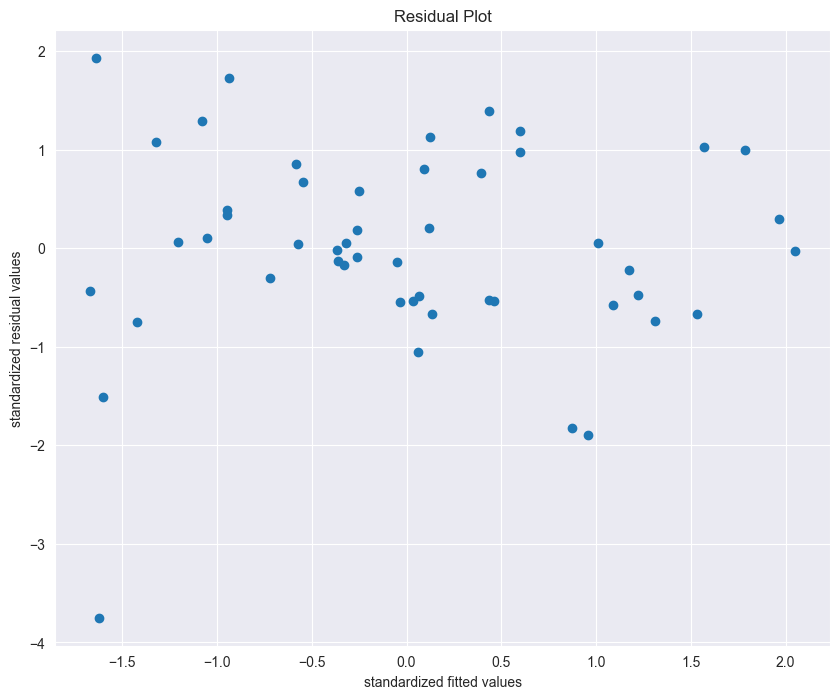

In [629]:
plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(SU_50_model.fittedvalues),  # SU_50_model.fittedvalue is y-hat
	        get_standardized_values(SU_50_model.resid))         # SU_50_model.resid is error
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

#### **Residual Vs Regressors**

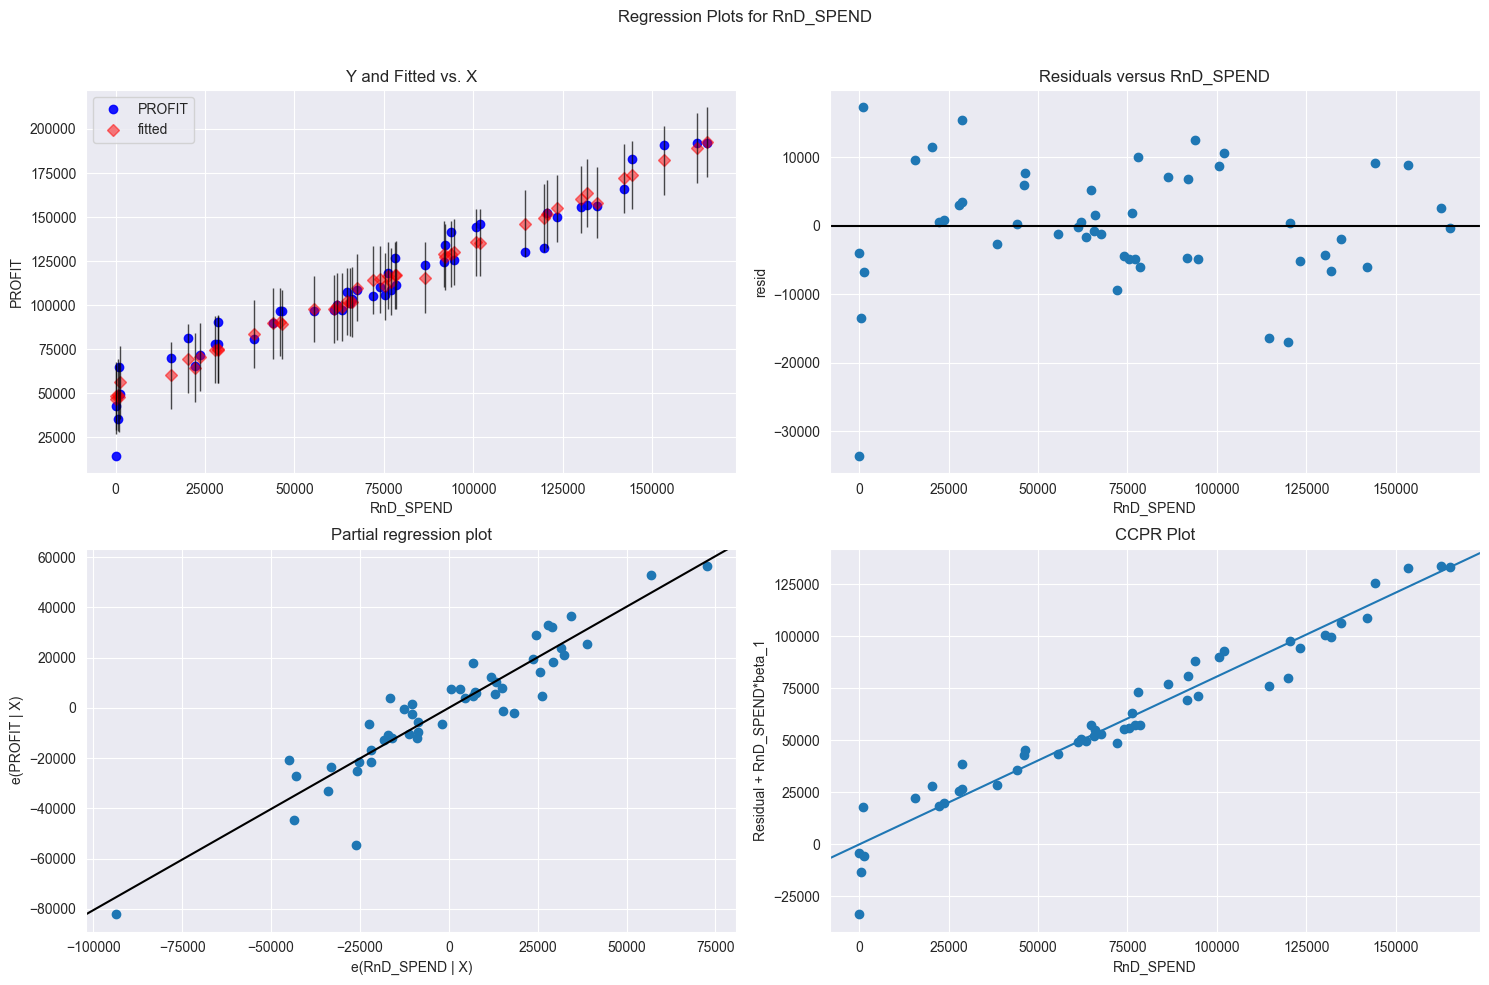

In [630]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(SU_50_model,'RnD_SPEND',fig=fig)
plt.show()

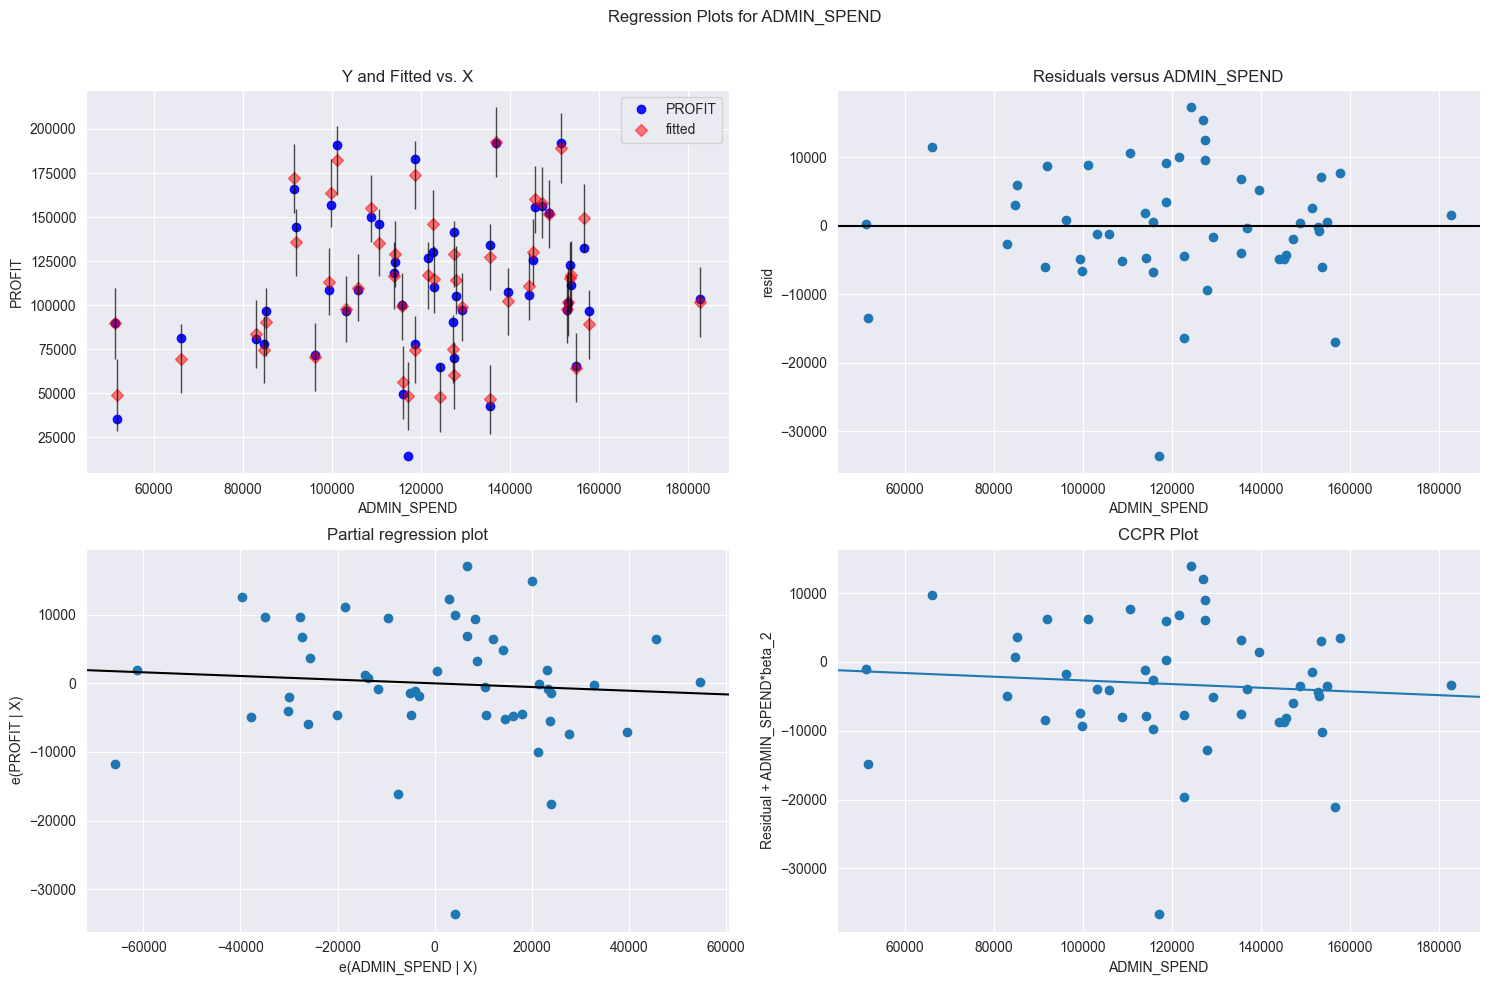

In [631]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(SU_50_model,'ADMIN_SPEND',fig=fig)
plt.show()

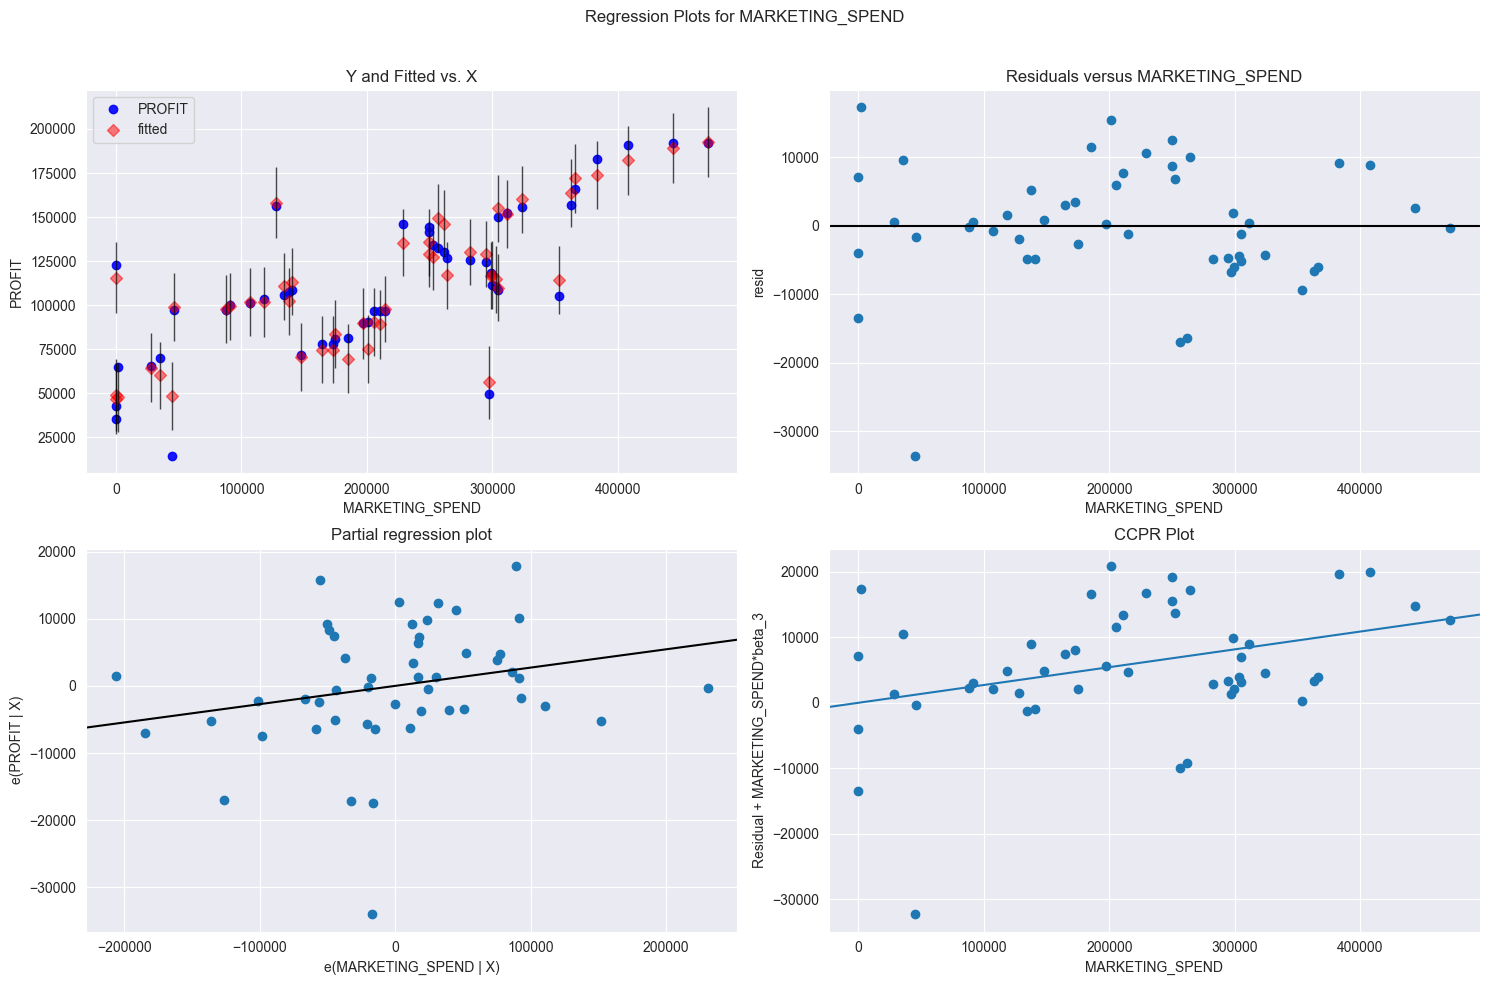

In [632]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(SU_50_model,'MARKETING_SPEND',fig=fig)
plt.show()

### **Model Deletion Diagnostics**

#### ***Detecting Influencers/Outliers***

#### ***1. Cook's Distance***
> If Cook's Distance > 1 then it is an outlier

In [633]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = SU_50_model.get_influence()   # this method will return 2 values: cook's distance and p-value.
(c, _) = model_influence.cooks_distance         # we don't need p-value so we placed _ here. That is temporary place holder.
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

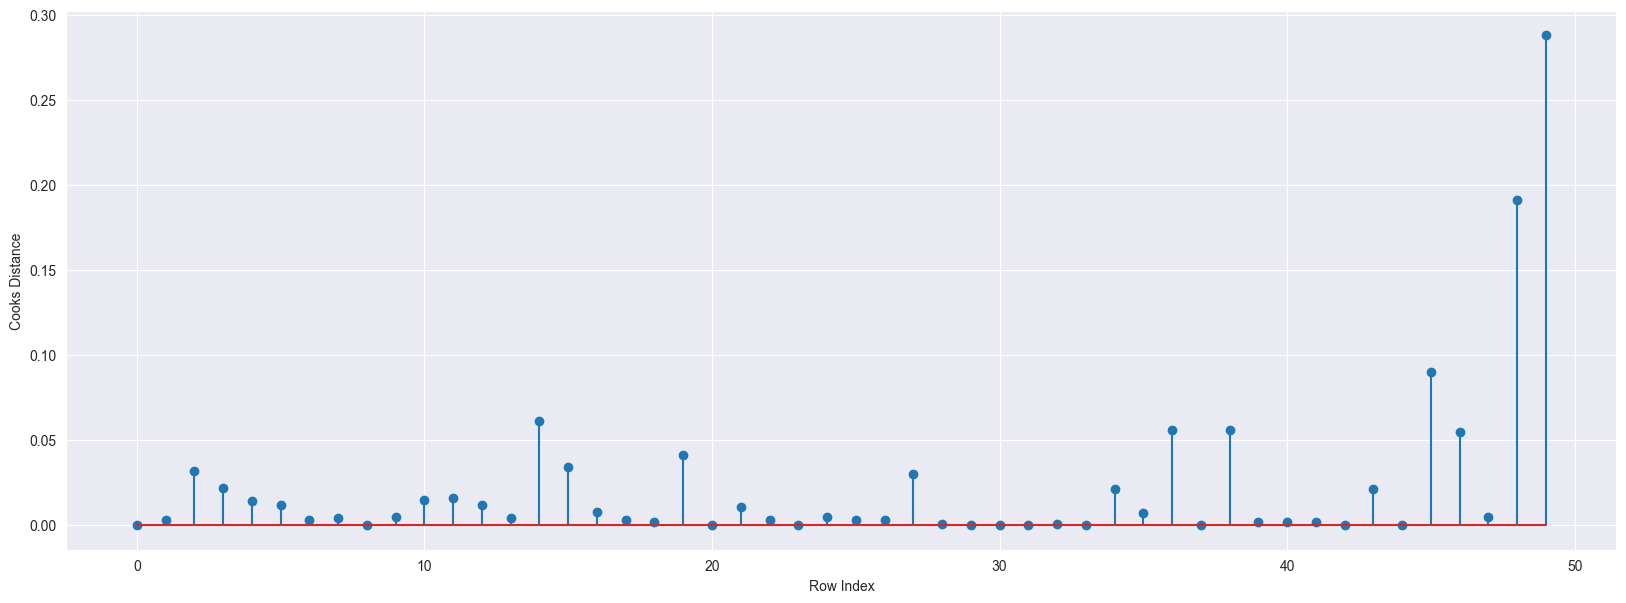

In [634]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(SU_50_data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [635]:
# Index and Value of influencer where c is more than 1.
# The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1.
(np.argmax(c),np.max(c)) # argmax() gives index value of max value in dataset
# 0.2880822927543264 is cook's distance for index 49, which is below 0.5

(49, 0.2880822927543264)

#### ***2. High Influence points***

In [636]:
SU_50_data.shape

(50, 4)

In [637]:
SU_50_data.shape[1]

4

In [638]:
k = SU_50_data.shape[1] # k is no of variables as 9
n = SU_50_data.shape[0] # no of data points as 1435
leverage_cutoff = 3*((k + 1))/n
leverage_cutoff

0.3

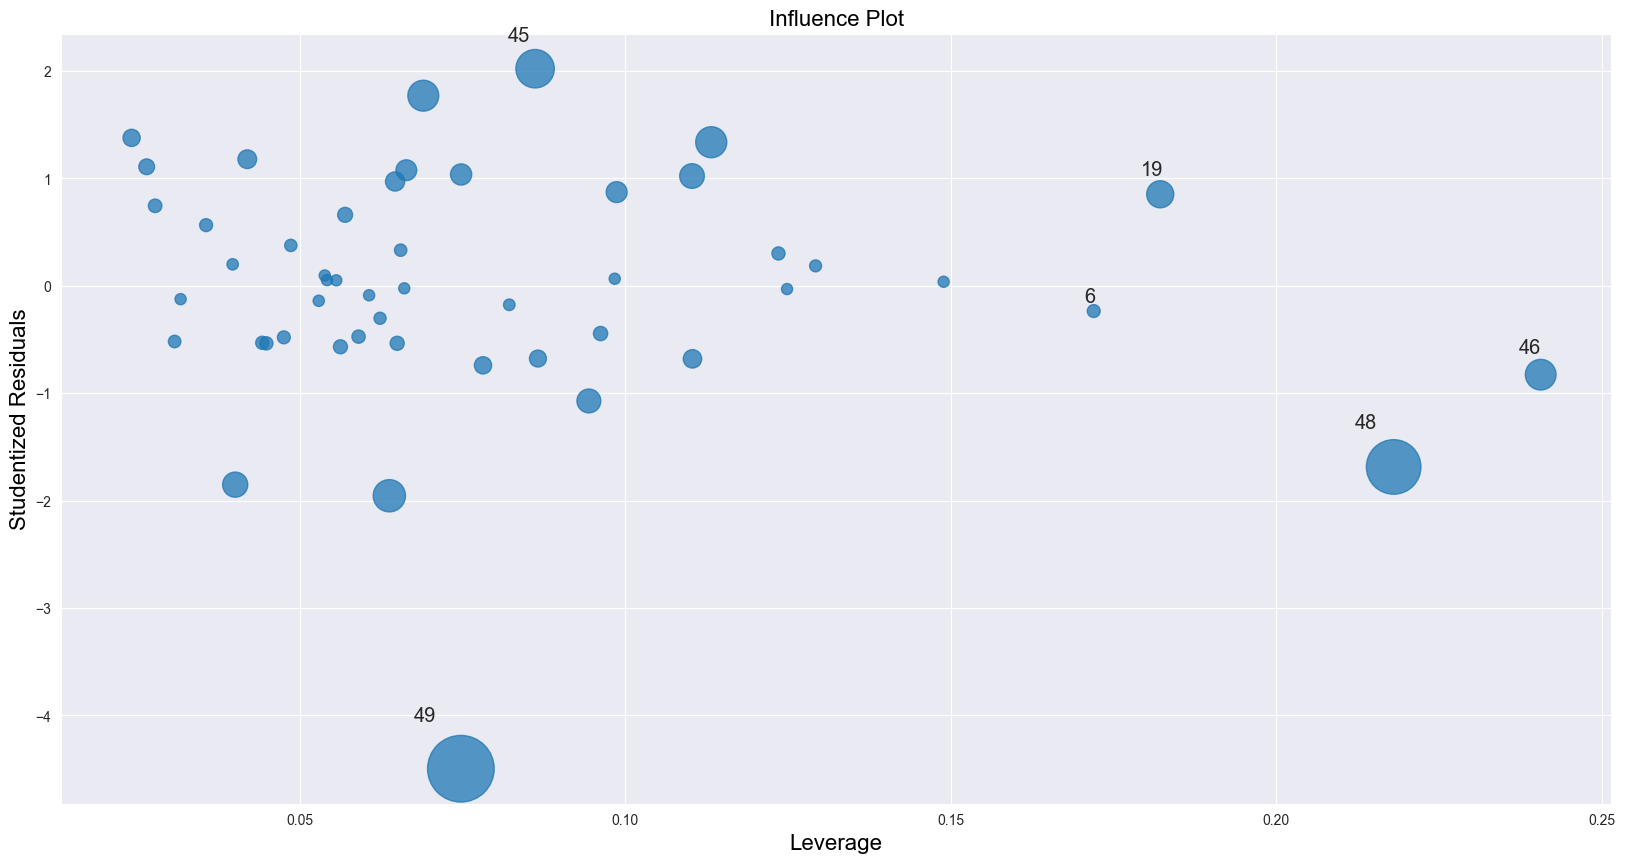

In [639]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(20,10))
fig=influence_plot(SU_50_model,ax = ax)

    From the above plot, it is evident that data point 49 is the influencer

In [640]:
SU_50_data[SU_50_data.index.isin([49])]

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND   PROFIT
49        0.0     116983.8         45173.06  14681.4

In [641]:
# See the differences in RnD_SPEND, which is 0.0 and other variable values
SU_50_data.head()

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND     PROFIT
0  165349.20    136897.80        471784.10  192261.83
1  162597.70    151377.59        443898.53  191792.06
2  153441.51    101145.55        407934.54  191050.39
3  144372.41    118671.85        383199.62  182901.99
4  142107.34     91391.77        366168.42  166187.94

### **Improving the model**

In [642]:
# Taking a backup by creating a copy of the data frame having the necessary columns
SU_50_data_new = SU_50_data.copy(deep=True)
SU_50_data_new[0:5]

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND     PROFIT
0  165349.20    136897.80        471784.10  192261.83
1  162597.70    151377.59        443898.53  191792.06
2  153441.51    101145.55        407934.54  191050.39
3  144372.41    118671.85        383199.62  182901.99
4  142107.34     91391.77        366168.42  166187.94

In [643]:
# Discarding the data points which are influencers and reassigning the row numbers (reset_index(drop=True))
SU_50_data_temp=SU_50_data_new.drop(SU_50_data_new.index[[49]],axis=0).reset_index(drop=True)
SU_50_data_new = SU_50_data_temp
SU_50_data_new

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND     PROFIT
0   165349.20    136897.80        471784.10  192261.83
1   162597.70    151377.59        443898.53  191792.06
2   153441.51    101145.55        407934.54  191050.39
3   144372.41    118671.85        383199.62  182901.99
4   142107.34     91391.77        366168.42  166187.94
5   131876.90     99814.71        362861.36  156991.12
6   134615.46    147198.87        127716.82  156122.51
7   130298.13    145530.06        323876.68  155752.60
8   120542.52    148718.95        311613.29  152211.77
9   123334.88    108679.17        304981.62  149759.96
10  101913.08    110594.11        229160.95  146121.95
11  100671.96     91790.61        249744.55  144259.40
12   93863.75    127320.38        249839.44  141585.52
13   91992.39    135495.07        252664.93  134307.35
14  119943.24    156547.42        256512.92  132602.65
15  114523.61    122616.84        261776.23  129917.04
16   78013.11    121597.55        264346.06  126992.93
17   94657.16    145077.58        282574.31  125370.37
18   91749.16    114175.79        294919.57  124266.90
19   86419.70    153514.11             0.00  122776.86
20   76253.86    113867.30        298664.47  118474.03
21   78389.47    153773.43        299737.29  111313.02
22   73994.56    122782.75        303319.26  110352.25
23   67532.53    105751.03        304768.73  108733.99
24   77044.01     99281.34        140574.81  108552.04
25   64664.71    139553.16        137962.62  107404.34
26   75328.87    144135.98        134050.07  105733.54
27   72107.60    127864.55        353183.81  105008.31
28   66051.52    182645.56        118148.20  103282.38
29   65605.48    153032.06        107138.38  101004.64
30   61994.48    115641.28         91131.24   99937.59
31   61136.38    152701.92         88218.23   97483.56
32   63408.86    129219.61         46085.25   97427.84
33   55493.95    103057.49        214634.81   96778.92
34   46426.07    157693.92        210797.67   96712.80
35   46014.02     85047.44        205517.64   96479.51
36   28663.76    127056.21        201126.82   90708.19
37   44069.95     51283.14        197029.42   89949.14
38   20229.59     65947.93        185265.10   81229.06
39   38558.51     82982.09        174999.30   81005.76
40   28754.33    118546.05        172795.67   78239.91
41   27892.92     84710.77        164470.71   77798.83
42   23640.93     96189.63        148001.11   71498.49
43   15505.73    127382.30         35534.17   69758.98
44   22177.74    154806.14         28334.72   65200.33
45    1000.23    124153.04          1903.93   64926.08
46    1315.46    115816.21        297114.46   49490.75
47       0.00    135426.92             0.00   42559.73
48     542.05     51743.15             0.00   35673.41

In [644]:
SU_50_data_new.describe()

RnD_SPEND    ADMIN_SPEND  MARKETING_SPEND         PROFIT
count      49.000000      49.000000        49.000000      49.000000
mean    75226.138367  121433.636327    214409.833265  113998.991020
std     45115.141560   28301.008988    121168.170072   38171.246893
min         0.000000   51283.140000         0.000000   35673.410000
25%     44069.950000  103057.490000    134050.070000   90708.190000
50%     73994.560000  122782.750000    214634.810000  108552.040000
75%    101913.080000  145077.580000    299737.290000  141585.520000
max    165349.200000  182645.560000    471784.100000  192261.830000

In [645]:
SU_50_data.shape

(50, 4)

In [646]:
SU_50_data_new.shape # One record less after removing one row

(49, 4)

#### **Regenerating the Model and cross checking for any influencers**

In [647]:
# Recreating the model and checking for any remaining influencers (if any)

import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

SU_50_model_new = smf.ols('PROFIT~RnD_SPEND+ADMIN_SPEND+MARKETING_SPEND',data=SU_50_data_new).fit() # model.resid is error

In [648]:
# The rsquared and aic value
(SU_50_model_new.rsquared,SU_50_model_new.aic) # The model accuracy is at 96% and AIC is 1020.57

# Since the Accuracy and AIC is optimum, we can stop here itself.
# However, if we want to improve the accuracy, we can further remove the influencers.

(0.9613162435129847, 1020.5652974526367)

In [649]:
# Loading the R-Squared value to a Table (Storing all R-Squared values for models created)
table.loc[len(table.index)] = ['Model_2', SU_50_model_new.rsquared] 
table

Models_Created  RSquared_Value
0       Original        0.950746
1        Model_2        0.961316

#### *Checking for influencers again*

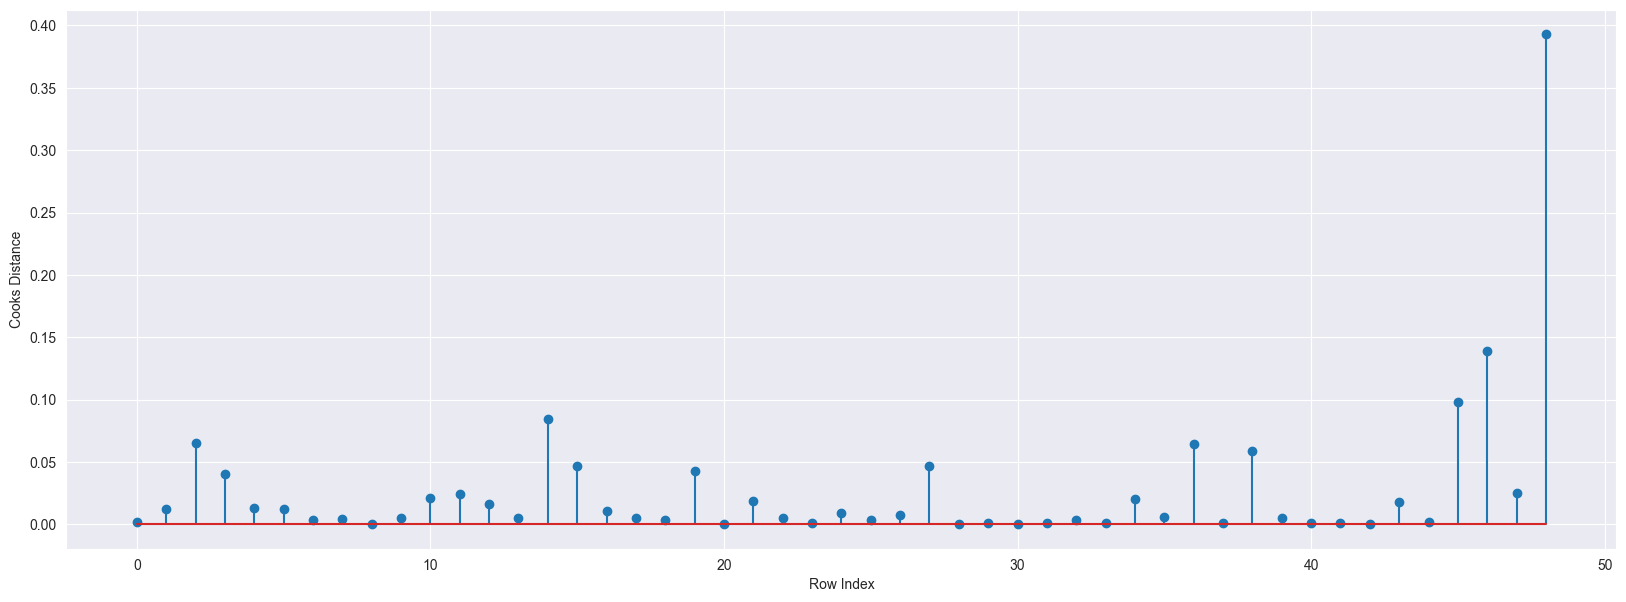

In [650]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

# Getting cooks distance and influencers points
model_influence = SU_50_model_new.get_influence() # this method will return 2 values: cook's distance and p-value.
(c, _) = model_influence.cooks_distance # we don't need p-value so we placed _ here. That is temporary place holder.
c

# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(SU_50_data_new)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

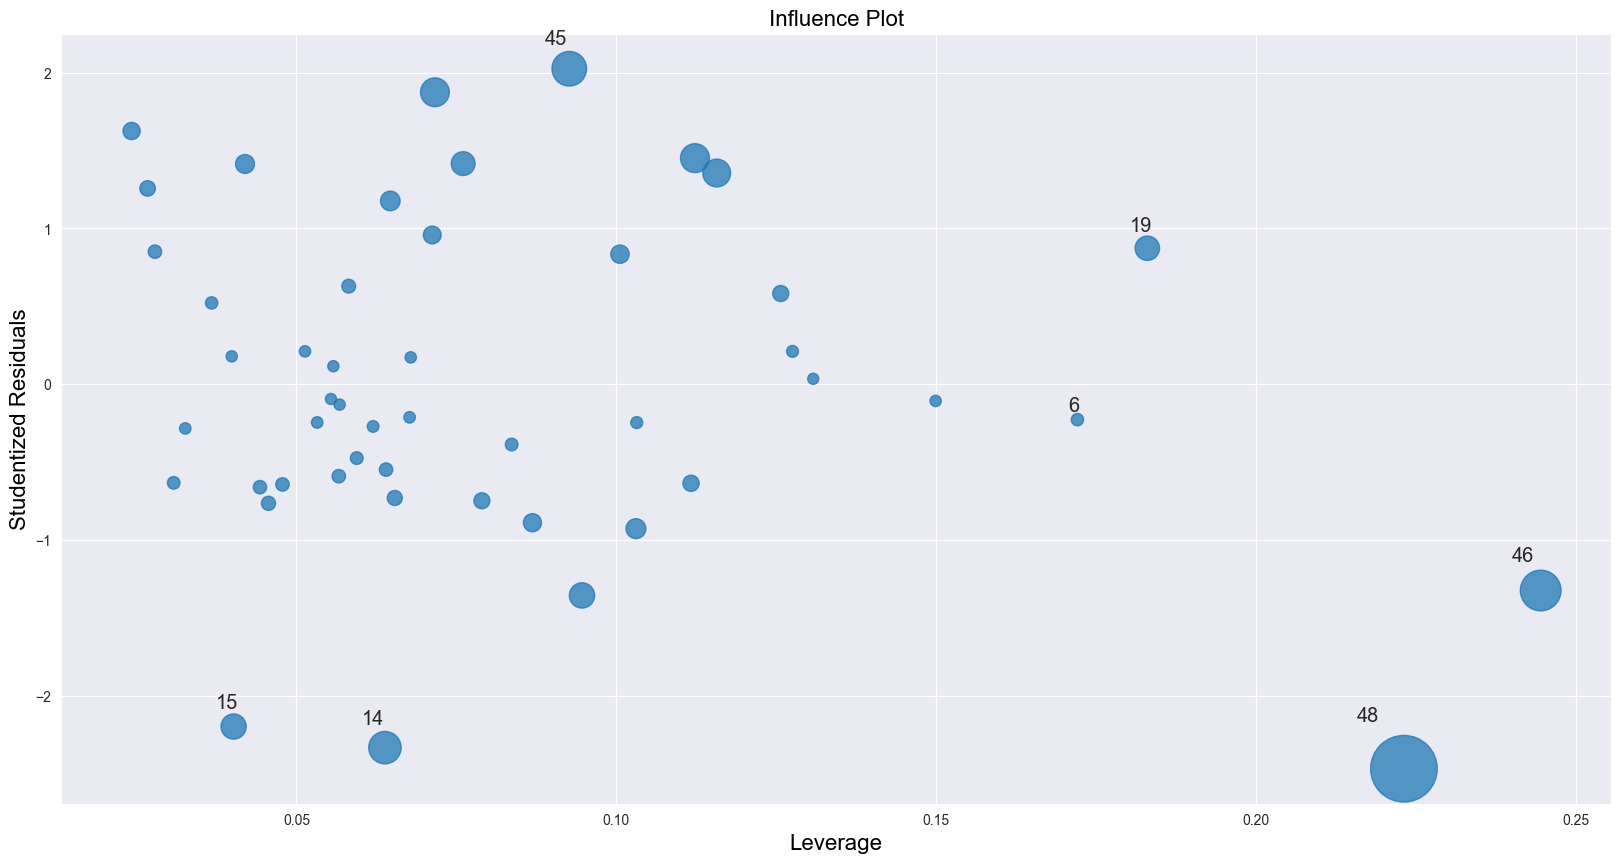

In [651]:
k = SU_50_data_new.shape[1] # k is no of variables as 9
n = SU_50_data_new.shape[0] # no of data points as 1435
leverage_cutoff = 3*((k + 1))/n
leverage_cutoff

fig,ax=plt.subplots(figsize=(20,10))
fig=influence_plot(SU_50_model_new,ax = ax)

In [652]:
(np.argmax(c),np.max(c)) # argmax() gives index value of max value in dataset
# 0.39274420556321443 is cook's distance for index 48

(48, 0.39274420556321443)

In [653]:
SU_50_data_new[SU_50_data_new.index.isin([48,46])]
# Since both have lesser than .5 we can ignore and stop here but if we want to increase the percentage accuracy, we can consider removing these points as well

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND    PROFIT
46    1315.46    115816.21        297114.46  49490.75
48     542.05     51743.15             0.00  35673.41

In [654]:
# Discarding the data points 46 and 48, which are influencers and reassigning the row numbers (reset_index(drop=True))
SU_50_data_temp2=SU_50_data_new.drop(SU_50_data_new.index[[46,48]],axis=0).reset_index(drop=True)
SU_50_data_new2 = SU_50_data_temp2

#### **Regenerating the Model and cross checking for any influencers**

In [655]:
# Recreating the model and checking for any remaining influencers (if any)

import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

SU_50_model_new2 = smf.ols('PROFIT~RnD_SPEND+ADMIN_SPEND+MARKETING_SPEND',data=SU_50_data_new2).fit() # model.resid is error

In [656]:
# The rsquared and aic value
(SU_50_model_new2.rsquared,SU_50_model_new2.aic) # The model accuracy is at 96% and AIC is 973.25

# Since the Accuracy is excellent and AIC is optimum, we can stop here itself.
# However, if we want to improve the accuracy, we can further remove the influencers.

(0.9614129113440602, 973.2489443962857)

In [657]:
# Loading the R-Squared value to a Table (Storing all R-Squared values for models created)
table.loc[len(table.index)] = ['Model_3', SU_50_model_new2.rsquared] 
table

Models_Created  RSquared_Value
0       Original        0.950746
1        Model_2        0.961316
2        Model_3        0.961413

#### **The Final DataFrame and Final Data Model**

In [658]:
# The final dataframe
final_SU_50_data = SU_50_data_new2.copy(deep=True)
final_SU_50_data[1:5]


RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND     PROFIT
1  162597.70    151377.59        443898.53  191792.06
2  153441.51    101145.55        407934.54  191050.39
3  144372.41    118671.85        383199.62  182901.99
4  142107.34     91391.77        366168.42  166187.94

In [659]:
# The final data model is SU_50_model_new2
final_model = smf.ols('PROFIT~RnD_SPEND+ADMIN_SPEND+MARKETING_SPEND',data=final_SU_50_data).fit()

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PROFIT   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           2.12e-30
Time:                        14:30:43   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
RnD_SPEND           0.7642      0.041     18.704      0.000       0.682       0.847
ADMIN_SPEND        -0.0532      0.044     -1.202      0.236      -0.142       0.036
MARKETING_SPEND     0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [660]:
# The final rsquared and aic value
(final_model.rsquared,final_model.aic)

(0.9614129113440602, 973.2489443962857)

In [661]:
final_model.params

Intercept          58228.661466
RnD_SPEND              0.764210
ADMIN_SPEND           -0.053193
MARKETING_SPEND        0.025087
dtype: float64

In [662]:
final_SU_50_data.head()

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND     PROFIT
0  165349.20    136897.80        471784.10  192261.83
1  162597.70    151377.59        443898.53  191792.06
2  153441.51    101145.55        407934.54  191050.39
3  144372.41    118671.85        383199.62  182901.99
4  142107.34     91391.77        366168.42  166187.94

In [663]:
# Creating Prediction_Model column with 96% accuracy which is a excellent model
final_SU_50_data['Predicted_Y'] = final_model.predict(final_SU_50_data)
final_SU_50_data[0:5]

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND     PROFIT    Predicted_Y
0  165349.20    136897.80        471784.10  192261.83  189144.021141
1  162597.70    151377.59        443898.53  191792.06  185571.505316
2  153441.51    101145.55        407934.54  191050.39  180343.992254
3  144372.41    118671.85        383199.62  182901.99  171860.489927
4  142107.34     91391.77        366168.42  166187.94  171153.336127

### **Predicting for new data**

In [664]:
# New data for prediction - what will be Price be for the following values?
new_data=pd.DataFrame({'RnD_SPEND':100000,"ADMIN_SPEND":95000,"MARKETING_SPEND":120000},index=[0])
new_data

RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND
0     100000        95000           120000

In [665]:
# Prediction with 96% accuracy
final_model.predict(new_data)

0    132606.856398
dtype: float64

### **Creation of a model with a specific accuracy 'final_model_spec_acc'**

- In order to do so, we will need to run the same steps as listed earlier to find the records with the maximum influencers.
- This step will take multiple steps and so we will need to program the same in order to achieve the desired result.

In [666]:
# Let's suppose we want the accuracy to be 99%, we we feed the same to the required rsquared value in the 'while loop block'
# Coping the dataframe from 'final_SU_50_data' for the first time as 'final_model_SPA'. Subsequently that will be done within the 'while loop block' after removing the outliers.
final_data_SPA = final_SU_50_data.copy(deep=True) # Here SA implies with Specific Percentage Accuracy. 

# Similarly initializing the model 'final_data_spec_acc'. Subsequently it will be done within the 'while loop block'.
final_model_SPA=smf.ols('PROFIT~RnD_SPEND+ADMIN_SPEND+MARKETING_SPEND',data=final_data_SPA).fit()

# Intializing the number of records dropped. Until now 3 records have been dropped and will increment in the 'while loop block'
records_dropped = 3

# No of Models added until now to the table
models_cnt = 3

while final_model_SPA.rsquared < 0.99:
    for c in [np.max(c) > 0.5]:
        final_model_SA=smf.ols('PROFIT~RnD_SPEND+ADMIN_SPEND+MARKETING_SPEND',data=final_data_SPA).fit()
        (c,_)=final_model_SPA.get_influence().cooks_distance
        print('Dropping the record with index', np.argmax(c))
        final_data_SPA=final_data_SPA.drop(final_data_SPA.index[[np.argmax(c)]],axis=0)
        records_dropped += 1
    else:
        final_model_SPA=smf.ols('PROFIT~RnD_SPEND+ADMIN_SPEND+MARKETING_SPEND',data=final_data_SPA).fit()
        print("UPDATED PERCENTAGE ACCURACY IS:",np.round(final_model_SPA.rsquared,4),"and AIC IS:", np.round(final_model_SPA.aic,4))
        models_cnt += 1
        model_label = 'Model_' + str(models_cnt)
        table.loc[len(table.index)] = [model_label, final_model_SPA.rsquared] 

print("\n\nTHE TOTAL NUMBER OF RECORDS DROPPED ARE:", records_dropped)
final_data_SPA=final_data_SPA.reset_index(drop=True)

Dropping the record with index 45
UPDATED PERCENTAGE ACCURACY IS: 0.9626 and AIC IS: 950.0636
Dropping the record with index 19
UPDATED PERCENTAGE ACCURACY IS: 0.9638 and AIC IS: 929.0199
Dropping the record with index 26
UPDATED PERCENTAGE ACCURACY IS: 0.9664 and AIC IS: 906.198
Dropping the record with index 14
UPDATED PERCENTAGE ACCURACY IS: 0.9706 and AIC IS: 880.8485
Dropping the record with index 33
UPDATED PERCENTAGE ACCURACY IS: 0.9728 and AIC IS: 857.7298
Dropping the record with index 34
UPDATED PERCENTAGE ACCURACY IS: 0.9734 and AIC IS: 836.4221
Dropping the record with index 14
UPDATED PERCENTAGE ACCURACY IS: 0.9786 and AIC IS: 808.5036
Dropping the record with index 2
UPDATED PERCENTAGE ACCURACY IS: 0.9777 and AIC IS: 786.9514
Dropping the record with index 17
UPDATED PERCENTAGE ACCURACY IS: 0.9791 and AIC IS: 765.6251
Dropping the record with index 2
UPDATED PERCENTAGE ACCURACY IS: 0.979 and AIC IS: 743.2619
Dropping the record with index 9
UPDATED PERCENTAGE ACCURACY IS:

In [667]:
final_model_SPA.rsquared # 99% accuracy

0.9906666289527223

In [668]:
# Adding predicted y value to SU_50_orig_data with 99% accuracy
SU_50_orig_data['Predicted_Y'] = final_model_SPA.predict(SU_50_orig_data)
SU_50_orig_data[0:5]


RnD_SPEND  ADMIN_SPEND  MARKETING_SPEND       STATE     PROFIT  \
0  165349.20    136897.80        471784.10    New York  192261.83   
1  162597.70    151377.59        443898.53  California  191792.06   
2  153441.51    101145.55        407934.54     Florida  191050.39   
3  144372.41    118671.85        383199.62    New York  182901.99   
4  142107.34     91391.77        366168.42     Florida  166187.94   

     Predicted_Y  
0  189137.964861  
1  186252.713071  
2  176560.728156  
3  169526.312901  
4  166273.896509

In [669]:
# Prediction of new data 'new_data' with 99% accuracy
final_model_SPA.predict(new_data) # 124671.95 with 99% accuracy Vs 132606.86 with 96% accuracy

0    124671.949601
dtype: float64

### **Table containing the R-Squared value for each model created**

In [670]:
table

Models_Created  RSquared_Value
0        Original        0.950746
1         Model_2        0.961316
2         Model_3        0.961413
3         Model_4        0.962594
4         Model_5        0.963849
5         Model_6        0.966390
6         Model_7        0.970608
7         Model_8        0.972784
8         Model_9        0.973429
9        Model_10        0.978580
10       Model_11        0.977738
11       Model_12        0.979051
12       Model_13        0.979000
13       Model_14        0.980788
14       Model_15        0.983830
15       Model_16        0.983115
16       Model_17        0.983377
17       Model_18        0.987889
18       Model_19        0.987719
19       Model_20        0.985836
20       Model_21        0.987477
21       Model_22        0.990667